Analysis of all data associated with the maize Truffula phenotype, and the ARFB protein stability tests. 

In [21]:
# Leaf counts from Amber de Neve 
W22<-read.table('/Users/aricha14/Documents/Research_Projects/TRF_Project/Data_from_Amber/Trf_W22_leaf_number.txt', header=TRUE, sep='\t')
head(W22)
dim(W22)



Info,family,plant_number,phenotype,genotype,leaf_number
<fct>,<int>,<int>,<fct>,<fct>,<int>
Trf_W22,2318,1,N,+/+,13
Trf_W22,2318,2,mut,Trf/+,23
Trf_W22,2318,3,mut,Trf/+,25
Trf_W22,2318,4,mut,Trf/Trf,33
Trf_W22,2318,5,mut,Trf/Trf,48
Trf_W22,2318,6,mut,Trf/+,57


[1] 27  6

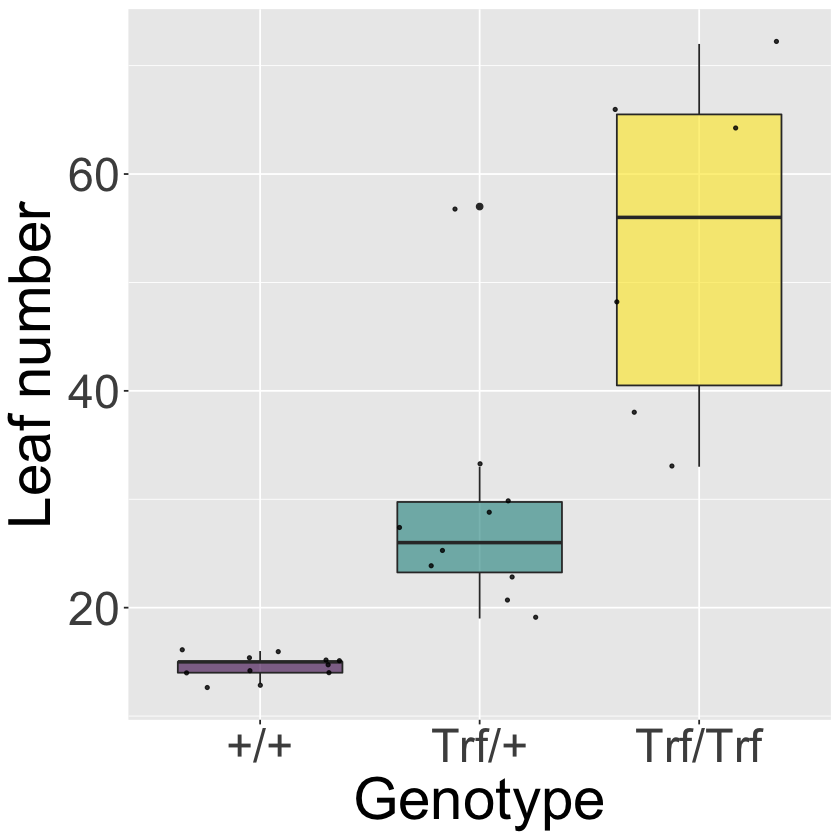

In [24]:
# Make a boxplot of Trf_W22 leaf number 
library(tidyverse)
library(viridis)
# Plot
W22 %>%
  ggplot (aes(x=factor(genotype, level=c('+/+','Trf/+','Trf/Trf')), y=leaf_number, fill=genotype)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 35),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Leaf number")


 

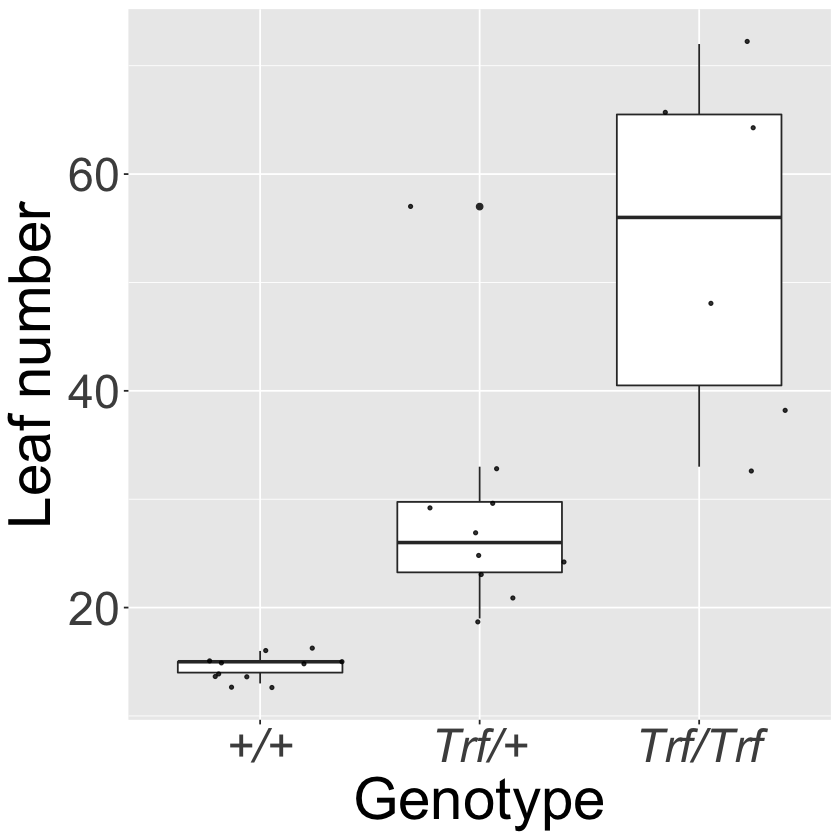

In [45]:
W22 %>%
  ggplot (aes(x=factor(genotype, level=c('+/+','Trf/+','Trf/Trf')), y=leaf_number)) +
    geom_boxplot() +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 35),
        axis.text.x=element_text(face=c("italic","italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Leaf number")




In [30]:
library("dplyr")
library("ggpubr")

Warning message:
“package ‘ggpubr’ was built under R version 3.6.2”


In [31]:
set.seed(1234)
dplyr::sample_n(W22, 10)

Info,family,plant_number,phenotype,genotype,leaf_number
<fct>,<int>,<int>,<fct>,<fct>,<int>
Trf_W22,2318,17,mut,Trf/+,29
Trf_W22,2318,27,N,+/+,14
Trf_W22,2318,23,N,+/+,15
Trf_W22,2318,5,mut,Trf/Trf,48
Trf_W22,2318,13,mut,Trf/+,19
Trf_W22,2318,16,N,+/+,14
Trf_W22,2318,9,N,+/+,15
Trf_W22,2318,25,N,+/+,16
Trf_W22,2318,6,mut,Trf/+,57



	Shapiro-Wilk normality test

data:  W22$leaf_number
W = 0.80096, p-value = 0.0001422


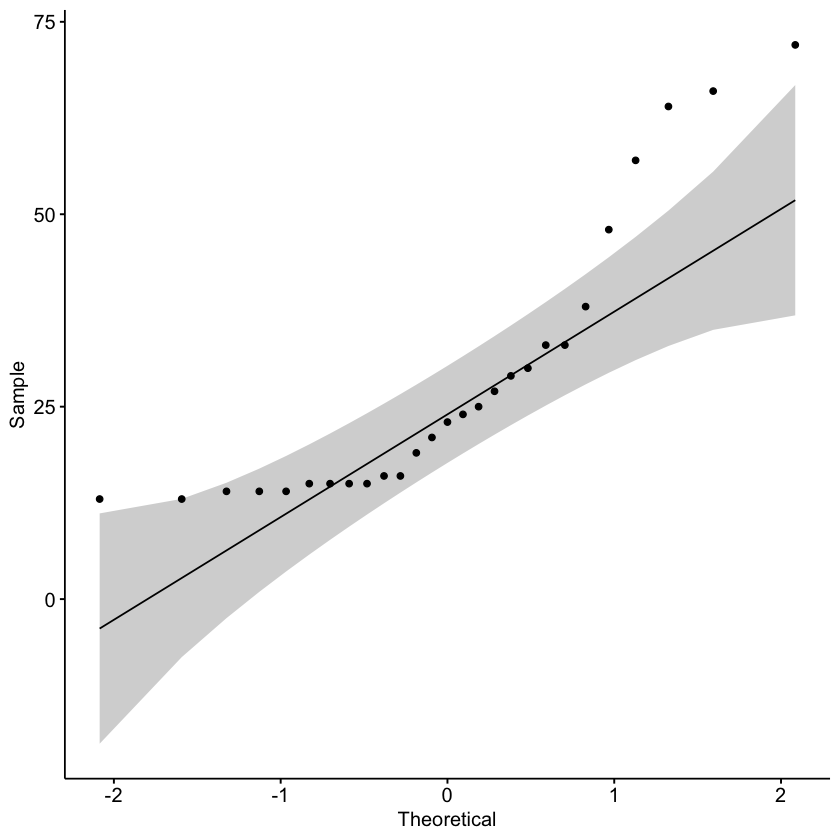

In [34]:
#Plot data against a plot of normality to visualy inspect 
ggqqplot(W22$leaf_number)
# Run the shapiro-wilks test to statsistically determine if the data is normal (H0 is that the data is normal, so P>0.05 is normal)
shapiro.test(W22$leaf_number)

In [ ]:
# The data is not normally distributed therefore we need to use a non-parametric statistical test 

In [35]:
group_by(W22, genotype) %>%
  summarise(
    count = n(),
    mean = mean(leaf_number, na.rm = TRUE),
    sd = sd(leaf_number, na.rm = TRUE),
    median = median(leaf_number, na.rm = TRUE),
    IQR = IQR(leaf_number, na.rm = TRUE)
  )

genotype,count,mean,sd,median,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
+/+,11,14.54545,1.035725,15,1.0
Trf/+,10,28.80000,10.778580,26,6.5
Trf/Trf,6,53.50000,16.121414,56,25.0


In [36]:
#Non parametric statistical test (Kruskal-Wallis)
kruskal.test(leaf_number ~ genotype, data = W22)


	Kruskal-Wallis rank sum test

data:  leaf_number by genotype
Kruskal-Wallis chi-squared = 21.944, df = 2, p-value = 1.718e-05


In [37]:
# As the Krusal-wallis test was signifcant, we now run pair-wise analysis to see which groups are signifcantly different 
pairwise.wilcox.test(W22$leaf_number, W22$genotype,
                 p.adjust.method = "BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  W22$leaf_number and W22$genotype 

        +/+     Trf/+  
Trf/+   0.00034 -      
Trf/Trf 0.00146 0.00477

P value adjustment method: BH 

In [48]:
# Plotting leaf initiation data 
I<-read.table('/Users/aricha14/Documents/Research_Projects/TRF_Project/Leaf_initiation_data_Amber.txt', header=TRUE, sep='\t')
head(I)
dim(I)

Family,Geno,ID,X23.03.2019,X02.04.2019,X06.04.2019,X13.04.2019,X20.04.2019,X27.04.2019,X04.05.2019,X11.05.2019
<fct>,<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2320-2,wt,1,4,6,7,8,10,13,13,13
2320-2,het,2,6,6,7,10,12,26,26,26
2320-2,wt,3,4,6,7,8,10,13,13,13
2320-2,wt,4,4,6,6,7,9,11,11,11
2320-2,wt,5,4,6,7,8,10,13,13,13
2320-2,wt,6,5,6,7,8,10,12,12,12


[1] 44 11

In [49]:
library(tidyr)
I$X23.03.2019 <- as.numeric(as.character(I$X23.03.2019))
head(I)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Family,Geno,ID,X23.03.2019,X02.04.2019,X06.04.2019,X13.04.2019,X20.04.2019,X27.04.2019,X04.05.2019,X11.05.2019
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2320-2,wt,1,4,6,7,8,10,13,13,13
2320-2,het,2,6,6,7,10,12,26,26,26
2320-2,wt,3,4,6,7,8,10,13,13,13
2320-2,wt,4,4,6,6,7,9,11,11,11
2320-2,wt,5,4,6,7,8,10,13,13,13
2320-2,wt,6,5,6,7,8,10,12,12,12


In [50]:
# Need to reshape data table to long format

i<- I %>% pivot_longer(cols=c("X23.03.2019","X02.04.2019","X06.04.2019","X13.04.2019","X20.04.2019","X27.04.2019","X04.05.2019","X11.05.2019"),
                    names_to='week',
                    values_to='leaves')

head(i)

Family,Geno,ID,week,leaves
<fct>,<fct>,<dbl>,<chr>,<dbl>
2320-2,wt,1,X23.03.2019,4
2320-2,wt,1,X02.04.2019,6
2320-2,wt,1,X06.04.2019,7
2320-2,wt,1,X13.04.2019,8
2320-2,wt,1,X20.04.2019,10
2320-2,wt,1,X27.04.2019,13


In [51]:
i$week<-gsub("X","",as.character(i$week))
    
head(i)



Family,Geno,ID,week,leaves
<fct>,<fct>,<dbl>,<chr>,<dbl>
2320-2,wt,1,23.03.2019,4
2320-2,wt,1,02.04.2019,6
2320-2,wt,1,06.04.2019,7
2320-2,wt,1,13.04.2019,8
2320-2,wt,1,20.04.2019,10
2320-2,wt,1,27.04.2019,13


Warning message:
“Removed 14 rows containing missing values (geom_point).”


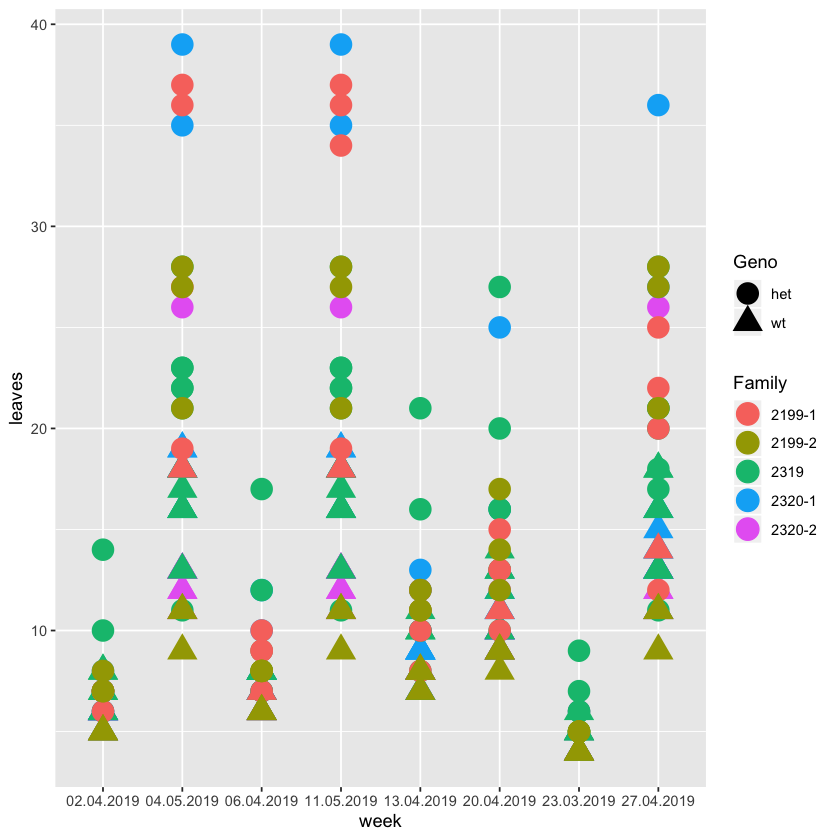

In [72]:

p<-ggplot(i, aes(x=week, y=leaves, color=Family, shape=Geno)) + 
    geom_point(size=6) 
p
 # ggplot( aes(x=week, y=leaves)) +
  #  geom_line() +
  #  geom_point()

In [78]:
df<-i
df$Family<-gsub("-2","",as.character(df$Family))
    
head(df)

Family,Geno,ID,week,leaves
<chr>,<fct>,<dbl>,<chr>,<dbl>
2320,wt,1,23.03.2019,4
2320,wt,1,02.04.2019,6
2320,wt,1,06.04.2019,7
2320,wt,1,13.04.2019,8
2320,wt,1,20.04.2019,10
2320,wt,1,27.04.2019,13


In [79]:

df$Family<-gsub("-1","",as.character(df$Family))
    

Warning message:
“Removed 14 rows containing missing values (geom_point).”


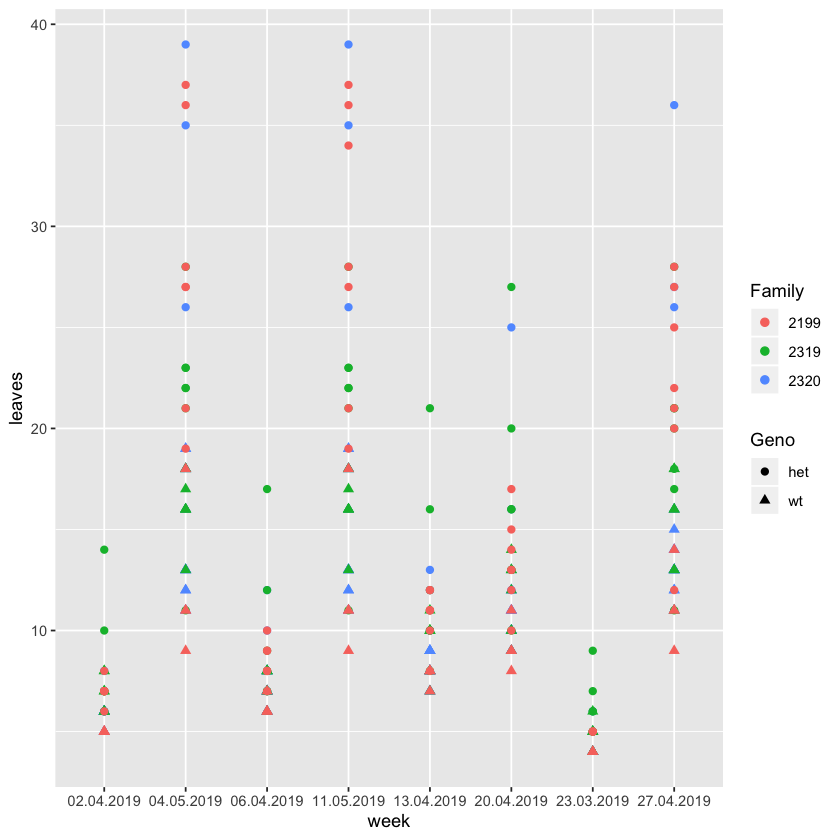

In [80]:
p<-ggplot(df, aes(x=week, y=leaves, color=Family, shape=Geno)) + 
    geom_point(size=2) 
p

In [109]:
# Plotting leaf initiation data 
LA<-read.table('/Users/aricha14/Documents/Research_Projects/TRF_Project/Leaf_initiation_data_averages_Amber.txt', header=TRUE, sep='\t')
head(LA)
dim(LA)

Family,Geno,BX,Date,Mean,SD,Upper,Lower,n
<int>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<int>
2320,het,W22,5,6.000000,n/a,n/a,n/a,3
2320,het,W22,6,6.666667,1.154700538,8.398717474,4.934615859,3
2320,het,W22,7,9.666667,2.516611478,13.44158388,5.891749449,3
2320,het,W22,8,11.666667,1.527525232,13.95795451,9.375378819,16
2320,het,W22,9,17.666667,6.658328118,27.65415884,7.679174489,16
2320,het,W22,10,29.666667,5.507570547,37.92802249,21.40531085,16


[1] 48  9

In [110]:
LA$Family <- as.character(LA$Family)
head(LA)

Family,Geno,BX,Date,Mean,SD,Upper,Lower,n
<chr>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<int>
2320,het,W22,5,6.000000,n/a,n/a,n/a,3
2320,het,W22,6,6.666667,1.154700538,8.398717474,4.934615859,3
2320,het,W22,7,9.666667,2.516611478,13.44158388,5.891749449,3
2320,het,W22,8,11.666667,1.527525232,13.95795451,9.375378819,16
2320,het,W22,9,17.666667,6.658328118,27.65415884,7.679174489,16
2320,het,W22,10,29.666667,5.507570547,37.92802249,21.40531085,16


In [111]:
LA$SD <- as.numeric(as.character(LA$SD))
head(LA)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Family,Geno,BX,Date,Mean,SD,Upper,Lower,n
<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>
2320,het,W22,5,6.000000,NA,n/a,n/a,3
2320,het,W22,6,6.666667,1.154701,8.398717474,4.934615859,3
2320,het,W22,7,9.666667,2.516611,13.44158388,5.891749449,3
2320,het,W22,8,11.666667,1.527525,13.95795451,9.375378819,16
2320,het,W22,9,17.666667,6.658328,27.65415884,7.679174489,16
2320,het,W22,10,29.666667,5.507571,37.92802249,21.40531085,16


In [112]:
LA$Upper <- as.numeric(as.character(LA$Upper))
LA$Lower <- as.numeric(as.character(LA$Lower))
head(LA)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Family,Geno,BX,Date,Mean,SD,Upper,Lower,n
<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2320,het,W22,5,6.000000,NA,NA,NA,3
2320,het,W22,6,6.666667,1.154701,8.398717,4.934616,3
2320,het,W22,7,9.666667,2.516611,13.441584,5.891749,3
2320,het,W22,8,11.666667,1.527525,13.957955,9.375379,16
2320,het,W22,9,17.666667,6.658328,27.654159,7.679174,16
2320,het,W22,10,29.666667,5.507571,37.928022,21.405311,16


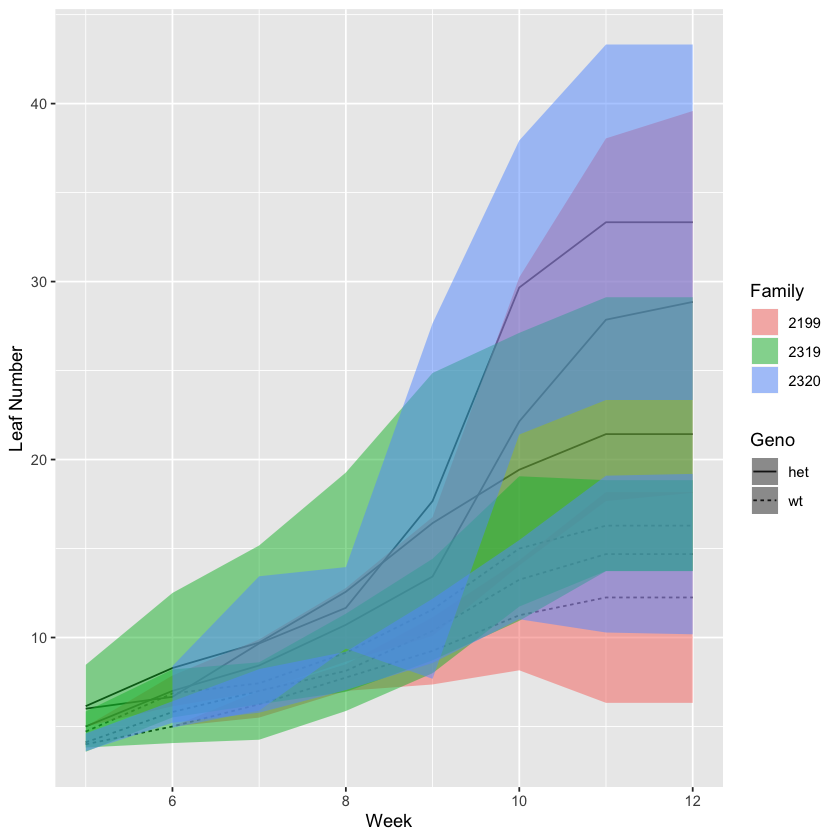

In [113]:
p<-ggplot(data=LA, aes(x=Date, y=Mean, ymin=Lower, ymax=Upper, fill=Family, linetype=Geno)) + 
 geom_line() + 
 geom_ribbon(alpha=0.5) + 
 xlab("Week") + 
 ylab("Leaf Number")
p

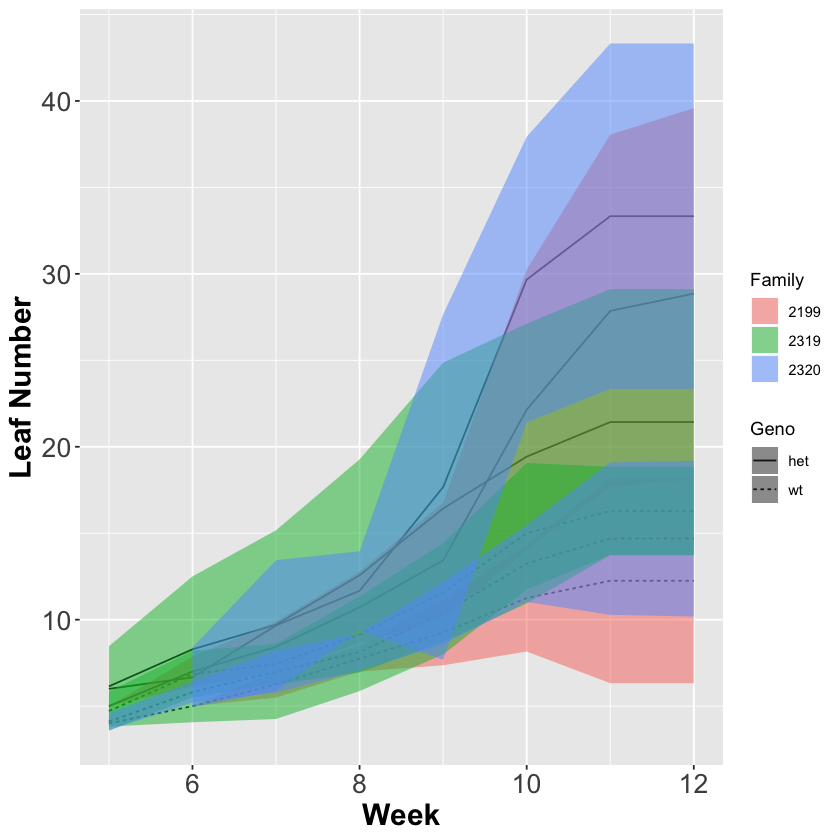

In [114]:
p+theme(axis.text=element_text(size=16),
        axis.title=element_text(size=18,face="bold"))

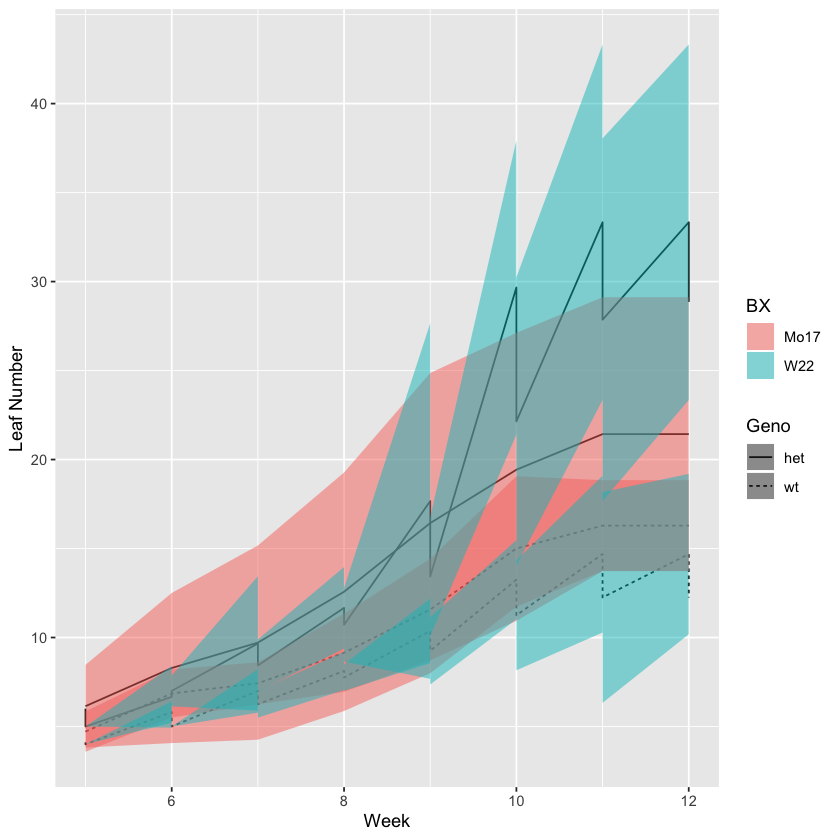

In [115]:
p2<-ggplot(data=LA, aes(x=Date, y=Mean, ymin=Lower, ymax=Upper, fill=BX, linetype=Geno)) + 
 geom_line() + 
 geom_ribbon(alpha=0.5) + 
 xlab("Week") + 
 ylab("Leaf Number")
p2

In [100]:
# Plotting leaf initiation data 
BA<-read.table('/Users/aricha14/Documents/Research_Projects/TRF/Leaf_initiation_data_BXaverages_Amber.txt', header=TRUE, sep='\t')
head(BA)
dim(BA)

,BX,Geno,Date,Mean,SD,Upper,Lower,n
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,W22,het,5,5.25,0.5000000,6.000000,4.500000,4
2,W22,het,6,6.90,0.7378648,8.006797,5.793203,10
3,W22,het,7,8.80,1.5491933,11.123790,6.476210,10
4,W22,het,8,11.00,1.4142136,13.121320,8.878680,10
5,W22,het,9,14.70,4.1646662,20.946999,8.453001,10
6,W22,het,10,24.40,6.2751715,33.812757,14.987243,10


[1] 32  8

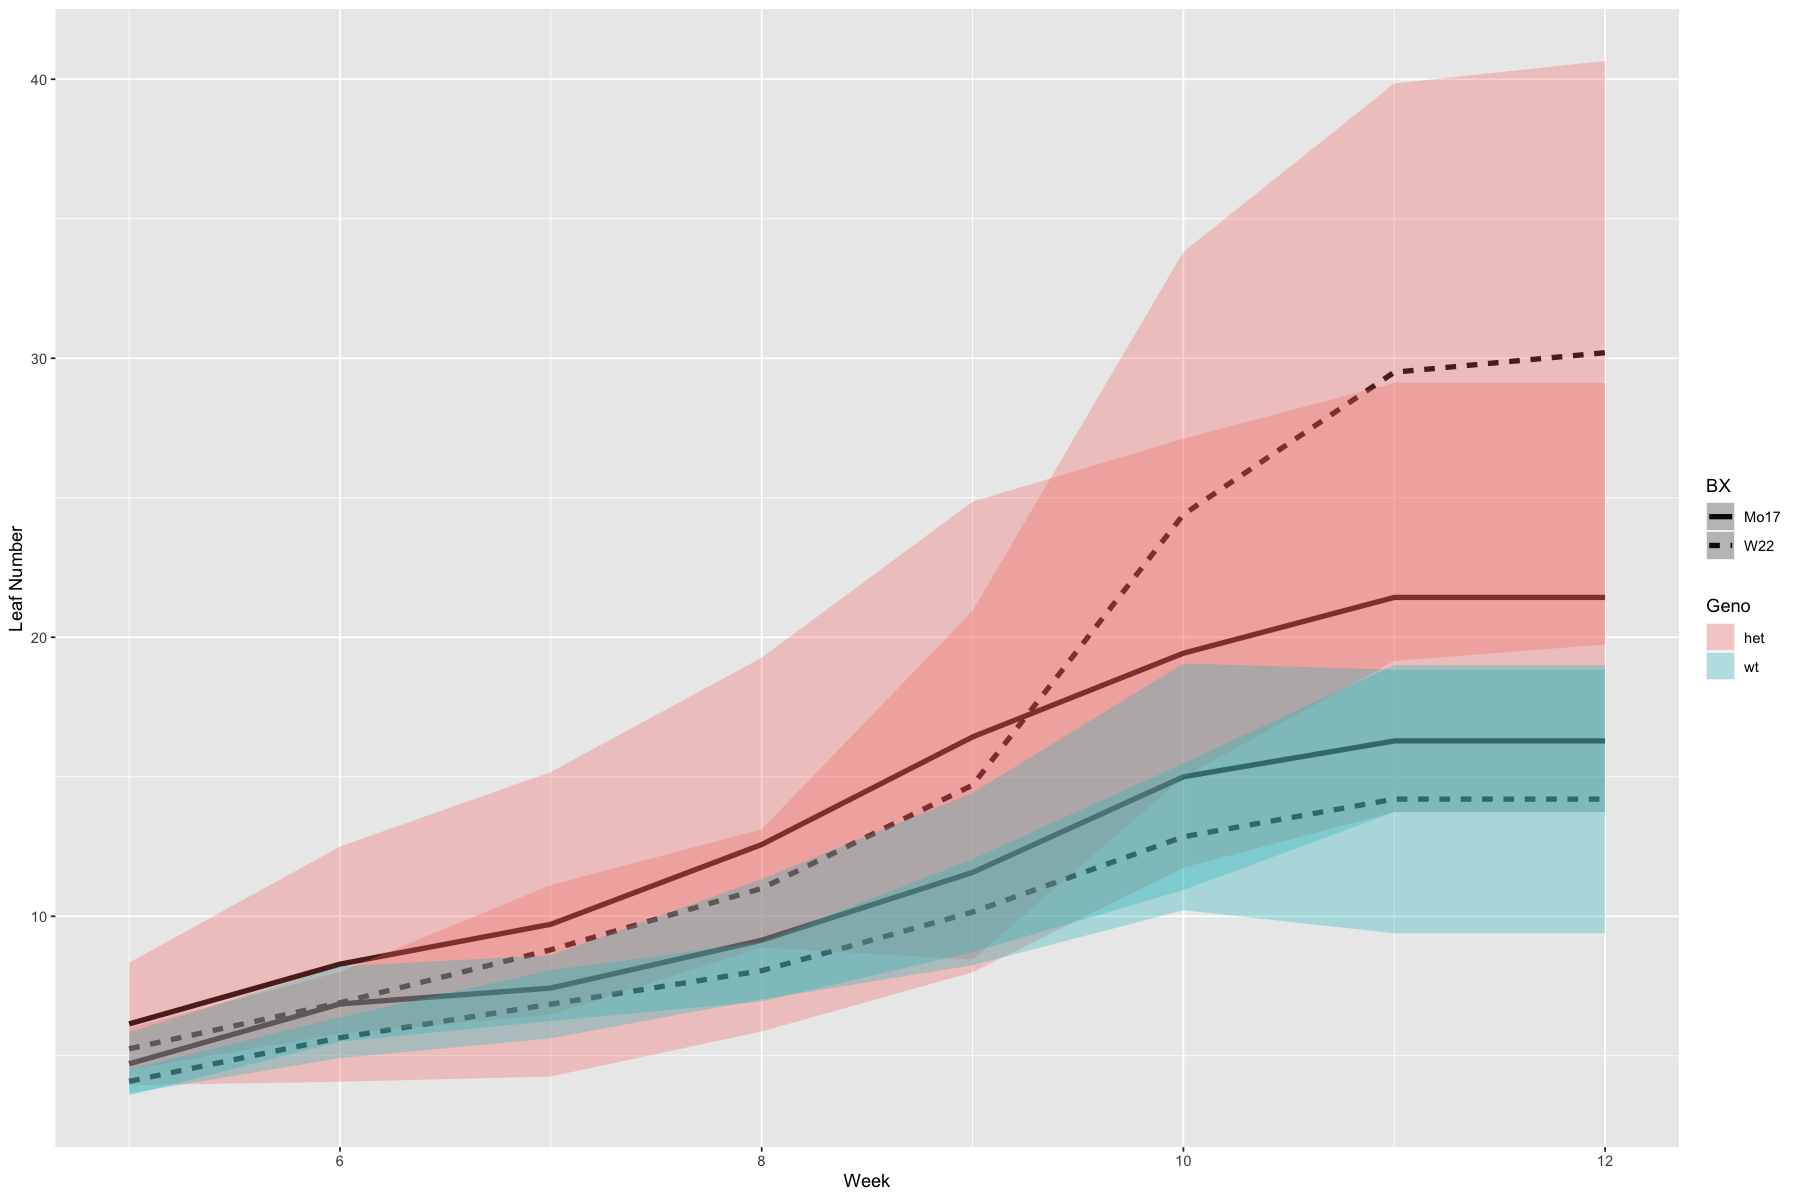

In [113]:
pleaf<-ggplot(data=BA, aes(x=Date, y=Mean, ymin=Lower, ymax=Upper, fill=Geno, linetype=BX)) + 
 geom_line(size=1.5) + 
 geom_ribbon(alpha=0.3) + 
 xlab("Week") + 
 ylab("Leaf Number")
pleaf

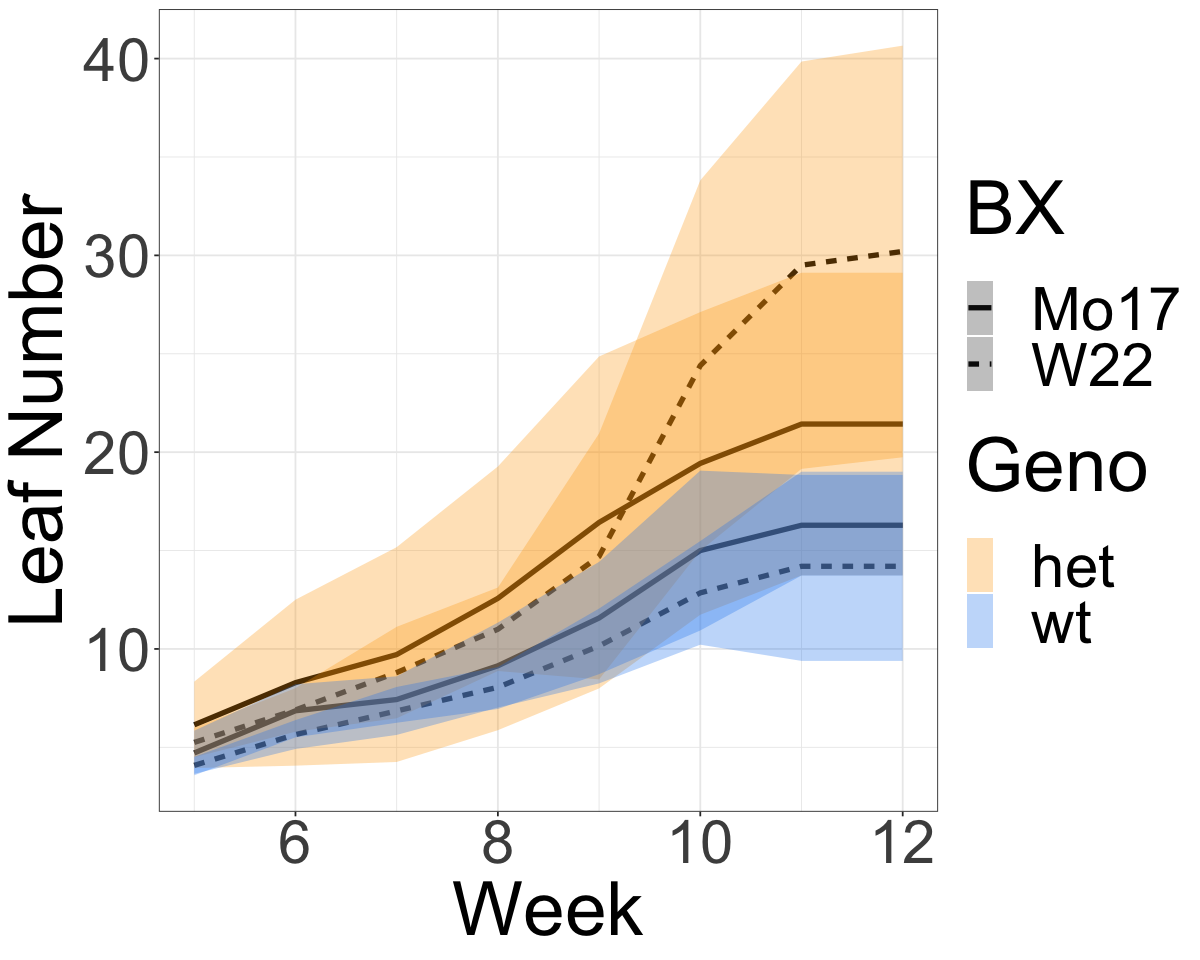

In [123]:
options(repr.plot.width=10, repr.plot.height=8)
pleaf +scale_fill_manual(values=c("orange","dodgerblue2")) + theme_bw() +  
theme(text = element_text(size = 45))

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
p3+theme(axis.text=element_text(size=20),
        axis.title=element_text(size=22))

ERROR: Error in eval(expr, envir, enclos): object 'p3' not found


In [5]:
Mo17<-read.table('/Users/aricha14/Documents/Research_Projects/TRF_Project/Amber_Mo17_data.txt', header=TRUE, sep='\t')
head(Mo17)
dim(Mo17)


family,plant_number,BX,phenotype,leaf_number,height..cm.
<int>,<int>,<fct>,<fct>,<int>,<fct>
2317,1,Mo17,mut,19,132
2317,3,Mo17,mut,17,200
2317,4,Mo17,mut,20,219
2317,7,Mo17,mut,19,214
2317,8,Mo17,mut,18,217
2317,9,Mo17,mut,19,226


[1] 31  6

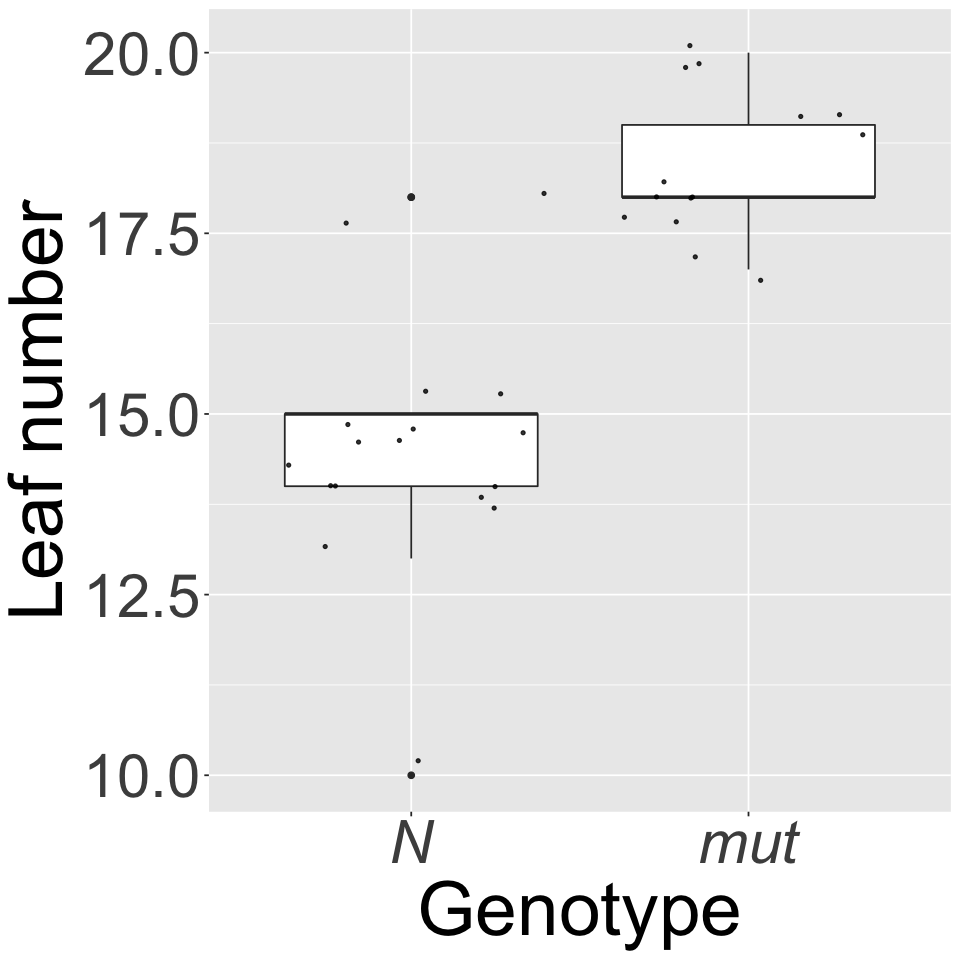

In [15]:
Mo17 %>%
  ggplot (aes(x=factor(phenotype, level=c('N','mut')), y=leaf_number)) +
    geom_boxplot() +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 45),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Leaf number")

Warning message:
“package ‘ggpubr’ was built under R version 3.6.2”


family,plant_number,BX,phenotype,leaf_number,height..cm.
<int>,<int>,<fct>,<fct>,<int>,<fct>
2317,6,Mo17,N,18,148
2317,5,Mo17,N,14,267
2317,29,Mo17,N,14,n/a
2317,23,Mo17,N,15,246
2317,8,Mo17,mut,18,217
2317,22,Mo17,mut,17,210
2317,2,Mo17,N,14,n/a
2317,15,Mo17,mut,18,201
2317,33,Mo17,N,14,n/a



	Shapiro-Wilk normality test

data:  Mo17$leaf_number
W = 0.91779, p-value = 0.02064


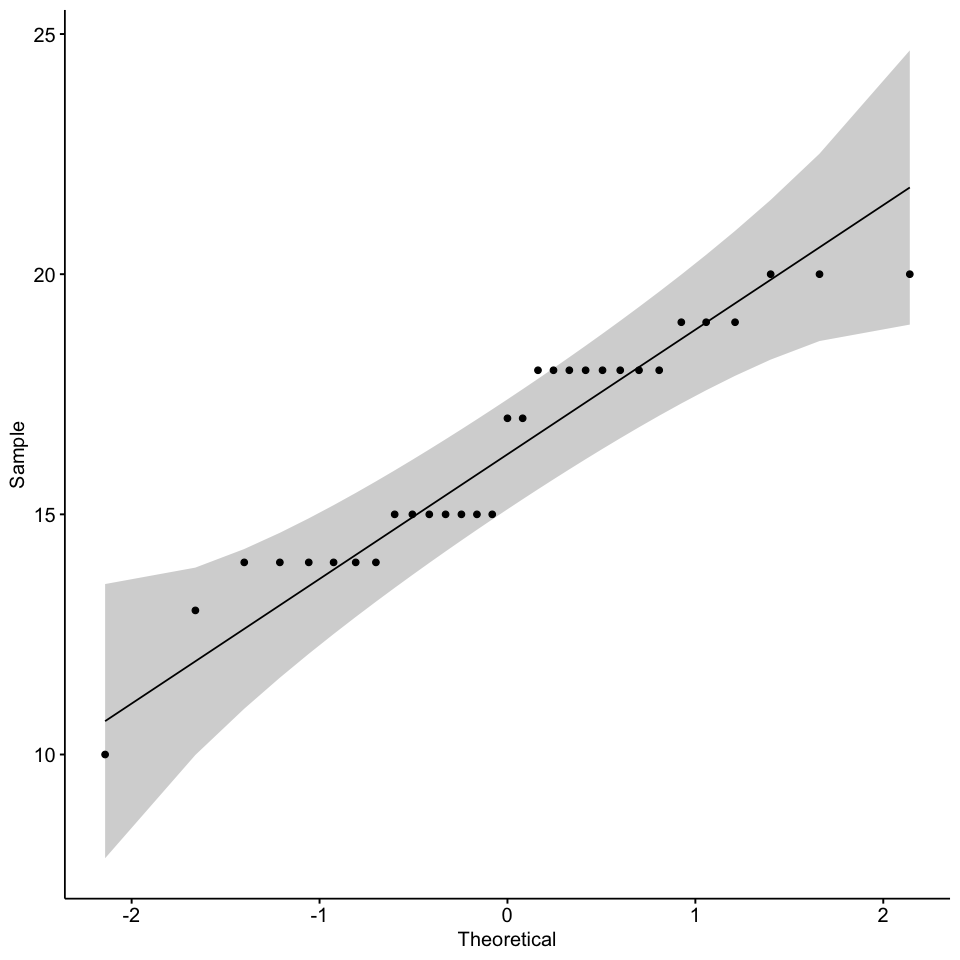

In [7]:
library("ggpubr")
#Test if data is normally distributed
set.seed(1234)
dplyr::sample_n(Mo17, 10)

#Plot data against a plot of normality to visualy inspect 
ggqqplot(Mo17$leaf_number)
# Run the shapiro-wilks test to statsistically determine if the data is normal (H0 is that the data is normal, so P>0.05 is normal)
shapiro.test(Mo17$leaf_number)

In [8]:
# Data is not normally distributed, therfore we need a non-parametric statistical test 
group_by(Mo17, phenotype) %>%
  summarise(
    count = n(),
    mean = mean(leaf_number, na.rm = TRUE),
    sd = sd(leaf_number, na.rm = TRUE),
    median = median(leaf_number, na.rm = TRUE),
    IQR = IQR(leaf_number, na.rm = TRUE)
  )

#Non parametric statistical test (Kruskal-Wallis)
kruskal.test(leaf_number ~ phenotype, data = Mo17)

phenotype,count,mean,sd,median,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
mut,14,18.50000,1.019049,18,1
N,17,14.58824,1.769845,15,1



	Kruskal-Wallis rank sum test

data:  leaf_number by phenotype
Kruskal-Wallis chi-squared = 19.441, df = 1, p-value = 1.037e-05


In [9]:
# As the Krusal-wallis test was signifcant, we now run pair-wise analysis to see which groups are signifcantly different 
pairwise.wilcox.test(Mo17$leaf_number, Mo17$phenotype,
                 p.adjust.method = "BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  Mo17$leaf_number and Mo17$phenotype 

  mut    
N 1.1e-05

P value adjustment method: BH 

In [10]:
Mo17$height..cm. <- as.numeric(as.character(Mo17$height..cm.))
head(Mo17)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


family,plant_number,BX,phenotype,leaf_number,height..cm.
<int>,<int>,<fct>,<fct>,<int>,<dbl>
2317,1,Mo17,mut,19,132
2317,3,Mo17,mut,17,200
2317,4,Mo17,mut,20,219
2317,7,Mo17,mut,19,214
2317,8,Mo17,mut,18,217
2317,9,Mo17,mut,19,226


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


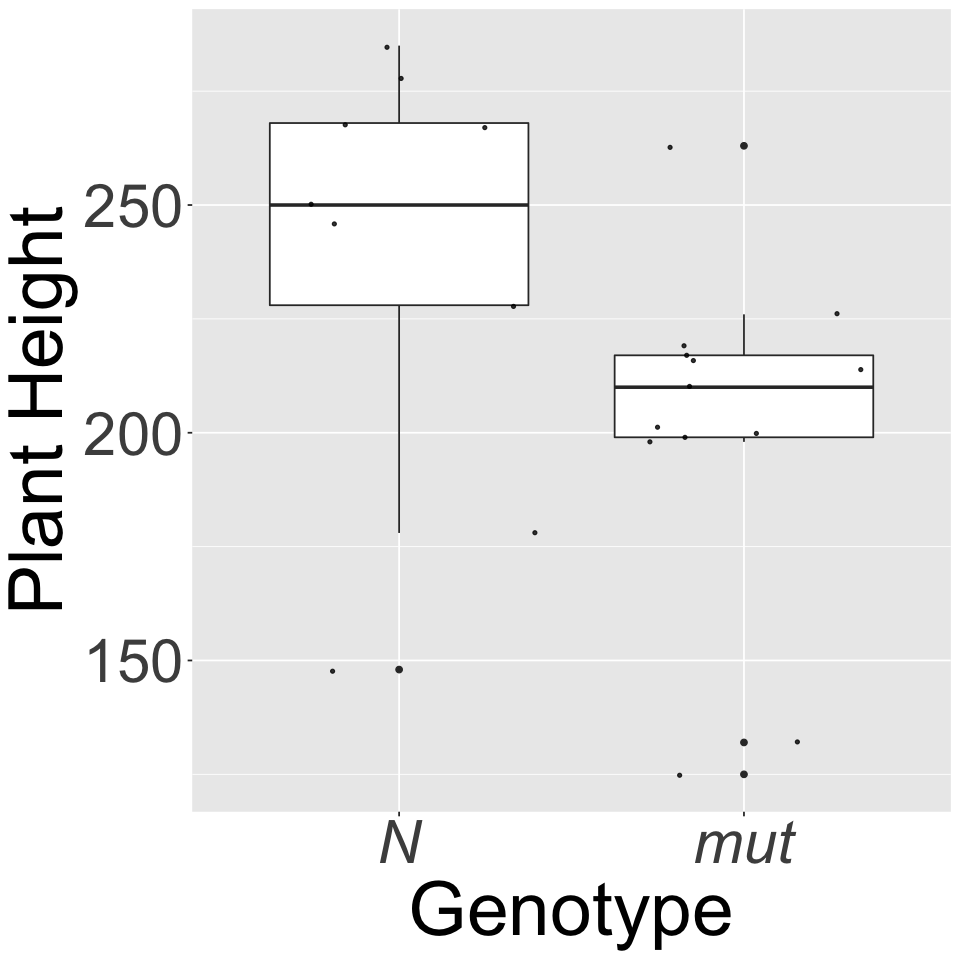

In [11]:
library(ggplot2)
library(tidyverse)
Mo17 %>%
  ggplot (aes(x=factor(phenotype, level=c('N','mut')), y=height..cm.)) +
    geom_boxplot() +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 45),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Plant Height")

family,plant_number,BX,phenotype,leaf_number,height..cm.
<int>,<int>,<fct>,<fct>,<int>,<dbl>
2317,6,Mo17,N,18,148
2317,5,Mo17,N,14,267
2317,29,Mo17,N,14,NA
2317,23,Mo17,N,15,246
2317,8,Mo17,mut,18,217
2317,22,Mo17,mut,17,210
2317,2,Mo17,N,14,NA
2317,15,Mo17,mut,18,201
2317,33,Mo17,N,14,NA


Warning message:
“Removed 9 rows containing non-finite values (stat_qq).”
Warning message:
“Removed 9 rows containing non-finite values (stat_qq_line).”
Warning message:
“Removed 9 rows containing non-finite values (stat_qq_line).”



	Shapiro-Wilk normality test

data:  Mo17$height..cm.
W = 0.94768, p-value = 0.2839


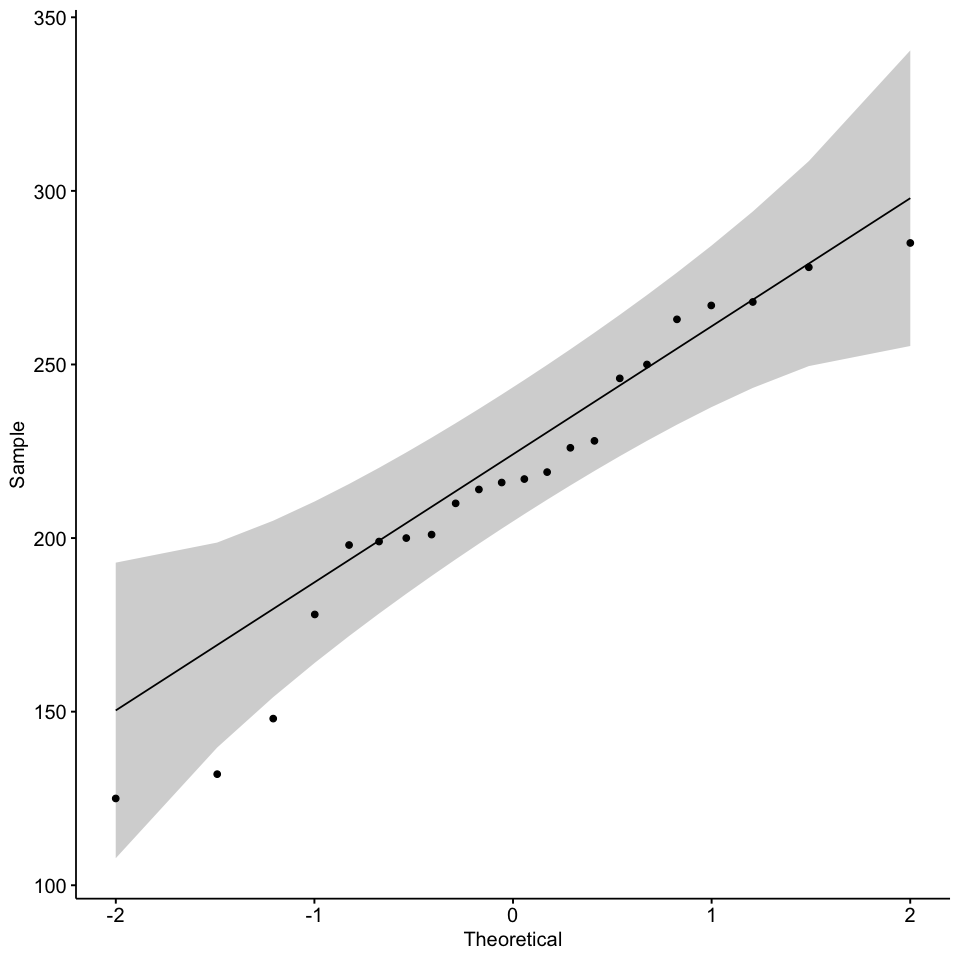

In [12]:
#Test if data is normally distributed
set.seed(1234)
dplyr::sample_n(Mo17, 10)

#Plot data against a plot of normality to visualy inspect 
ggqqplot(Mo17$height..cm.)
# Run the shapiro-wilks test to statsistically determine if the data is normal (H0 is that the data is normal, so P>0.05 is normal)
shapiro.test(Mo17$height..cm.)

In [13]:
# Data is normally distributed, so we can use a students t-test 
Mo17 %>%
  group_by(phenotype) %>%
  get_summary_stats(height..cm., type = "mean_sd")

phenotype,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
mut,height..cm.,13,201.538,36.596
N,height..cm.,9,238.667,46.843


In [14]:
res <- t.test(height..cm. ~ phenotype, data = Mo17)
res


	Welch Two Sample t-test

data:  height..cm. by phenotype
t = -1.9936, df = 14.467, p-value = 0.0654
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -76.950483   2.694073
sample estimates:
mean in group mut   mean in group N 
         201.5385          238.6667 


In [4]:
protein <- read.table('/Users/aricha14/Documents/Research_Projects/TRF/ARF28_quantification_2023.txt', sep='\t', header=T)
protein

Technical.Replicate,Sample.Genotype,Biological.Replicate,antiARF28.Signal.Area,antiTUBULIN.Signal.Area,Relative.Abundance.of.ARF28
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,N,1,8241.551,11400.94,0.7228837
1,N,2,10322.635,12681.23,0.8140090
1,Trf,1,23546.948,16710.39,1.4091200
1,Trf,2,31212.141,21025.88,1.4844632
2,N,3,14402.028,13496.52,1.0670918
2,N,4,11434.936,11636.04,0.9827174
2,Trf,3,22014.768,12918.08,1.7041829
2,Trf,4,30630.718,15783.46,1.9406842
3,N,5,28224.706,50609.29,0.5576981


Technical.Replicate,Sample.Genotype,Biological.Replicate,antiARF28.Signal.Area,antiTUBULIN.Signal.Area,Relative.Abundance.of.ARF28
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
3,Trf,6,49006.759,35573.24,1.3776299
3,N,6,32906.354,48063.86,0.6846382
2,N,4,11434.936,11636.04,0.9827174
2,N,3,14402.028,13496.52,1.0670918
1,Trf,2,31212.141,21025.88,1.4844632
2,Trf,3,22014.768,12918.08,1.7041829
1,N,1,8241.551,11400.94,0.7228837
3,N,5,28224.706,50609.29,0.5576981
1,N,2,10322.635,12681.23,0.8140090



	Shapiro-Wilk normality test

data:  protein$Relative.Abundance.of.ARF28
W = 0.95067, p-value = 0.6468


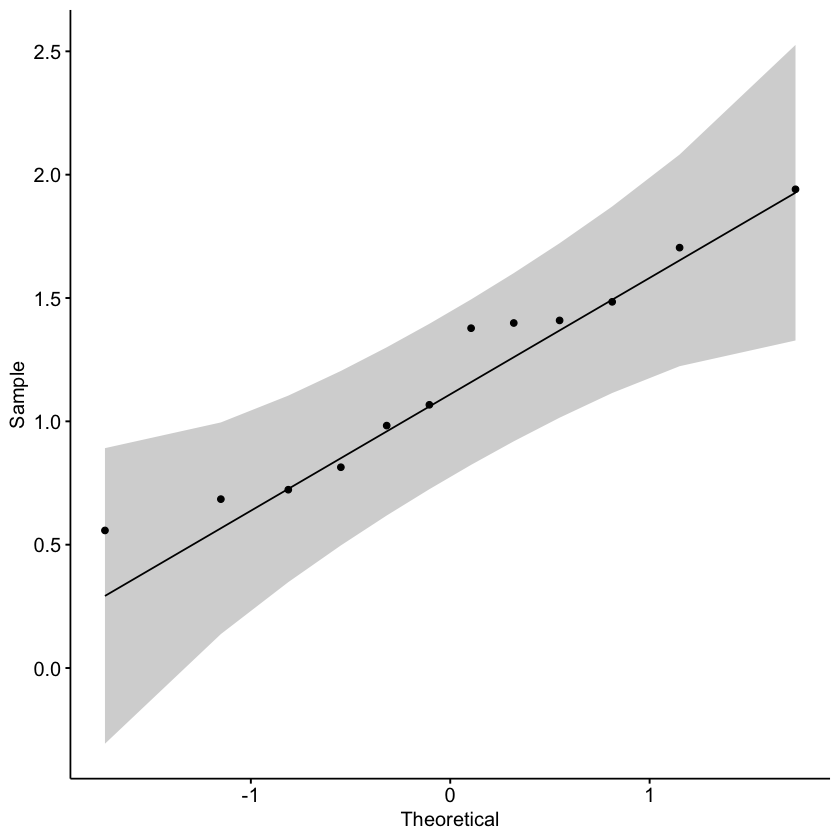

In [5]:
library("ggpubr")
#Test if data is normally distributed
set.seed(1234)
dplyr::sample_n(protein, 10)

#Plot data against a plot of normality to visualy inspect 
ggqqplot(protein$Relative.Abundance.of.ARF28)
# Run the shapiro-wilks test to statsistically determine if the data is normal (H0 is that the data is normal, so P>0.05 is normal)
shapiro.test(protein$Relative.Abundance.of.ARF28)

In [6]:
# Data is normally distributed, so we can use a students t-test 
protein %>%
  group_by(Sample.Genotype) %>%
  get_summary_stats(Relative.Abundance.of.ARF28, type = "mean_sd")

Sample.Genotype,variable,n,mean,sd
<chr>,<fct>,<dbl>,<dbl>,<dbl>
N,Relative.Abundance.of.ARF28,6,0.805,0.191
Trf,Relative.Abundance.of.ARF28,6,1.552,0.225


In [7]:
pres <- t.test(Relative.Abundance.of.ARF28 ~ Sample.Genotype, data = protein)
pres


	Welch Two Sample t-test

data:  Relative.Abundance.of.ARF28 by Sample.Genotype
t = -6.2025, df = 9.7459, p-value = 0.0001129
alternative hypothesis: true difference in means between group N and group Trf is not equal to 0
95 percent confidence interval:
 -1.017144 -0.478102
sample estimates:
  mean in group N mean in group Trf 
        0.8048397         1.5524628 


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


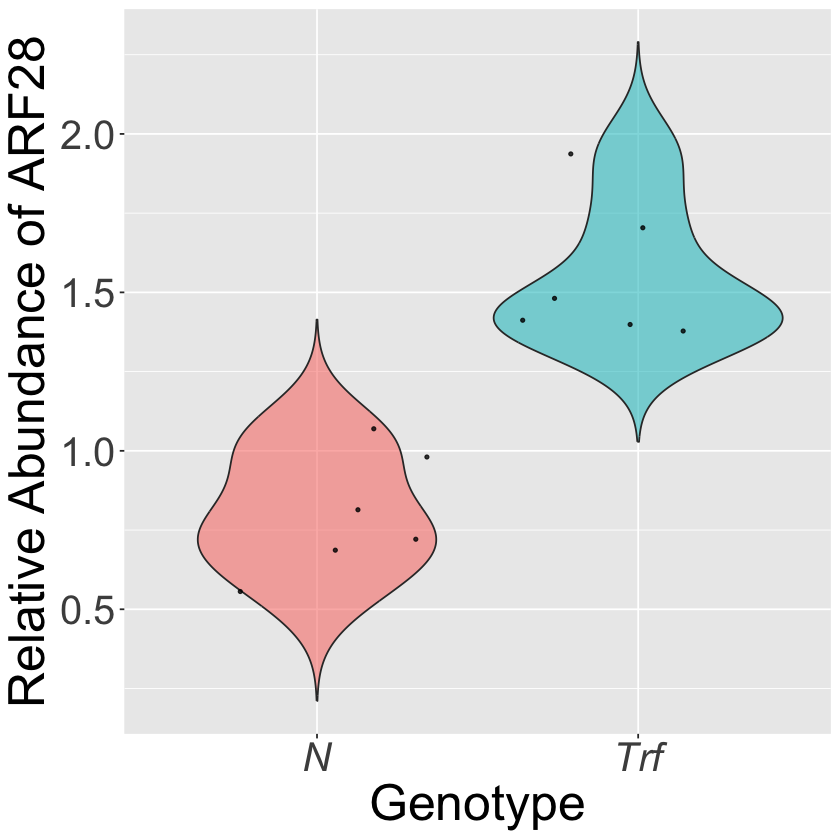

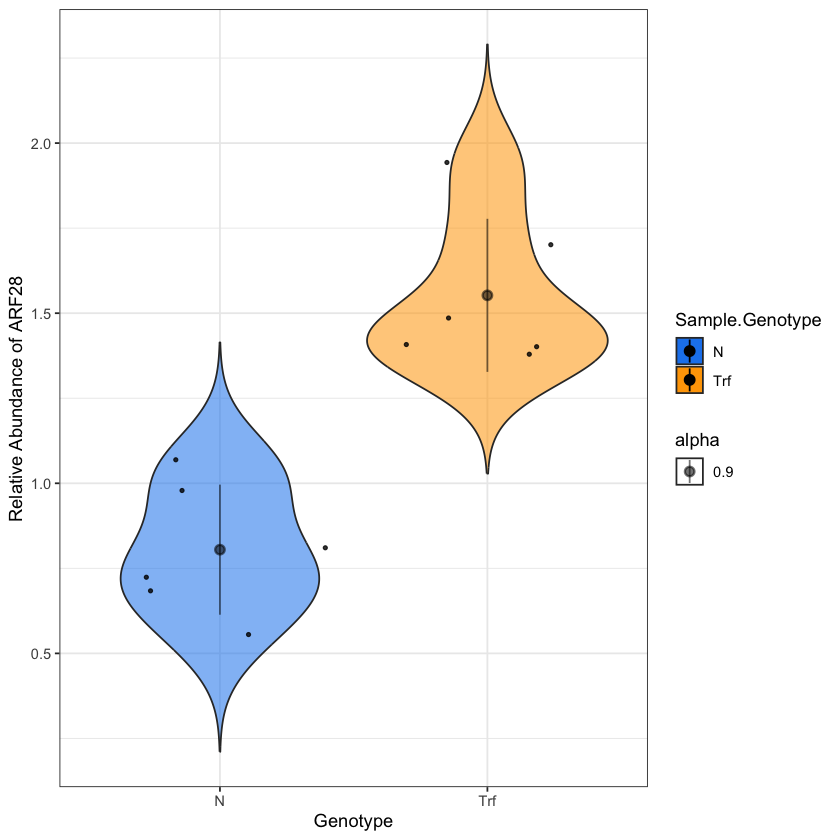

In [30]:
library(ggplot2)
library(tidyverse)
P<-protein %>%
  ggplot (aes(x=factor(Sample.Genotype, level=c('N','Trf')), y=Relative.Abundance.of.ARF28, fill=Sample.Genotype, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Relative Abundance of ARF28")
P
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(protein) {
   m <- mean(protein)
   ymin <- m-sd(protein)
   ymax <- m+sd(protein)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

P + stat_summary(fun.data=data_summary)+scale_fill_manual(values=c("dodgerblue2","orange")) + theme_bw()


In [94]:
# Mike's data Ypet moss data
Ypet <- read.table('/Users/aricha14/Documents/Research_Projects/TRF/Mike_data//220420 mYPet quant.txt', sep='\t', header=TRUE)
Ypet

Genotype,Line,CorIntDen
<chr>,<chr>,<dbl>
WT,124-60,2282.1690
WT,124-60,1161.1606
WT,124-60,1271.2459
WT,124-60,1158.3588
WT,124-60,1517.6726
WT,124-60,688.9823
WT,124-60,842.8351
WT,124-60,1058.0121
WT,124-60,1586.9730


Genotype,Line,CorIntDen
<chr>,<chr>,<dbl>
R269Q,157-2,8938.9190
Double,158-1,11902.8397
WT,124-60,910.6668
WT,124-60,1586.9730
WT,124-60,1517.6726
R269Q,157-4,3063.9059
WT,124-60,483.9958
WT,124-60,1158.3588
Double,158-2,5168.2708



	Shapiro-Wilk normality test

data:  Ypet$CorIntDen
W = 0.95615, p-value = 0.002298


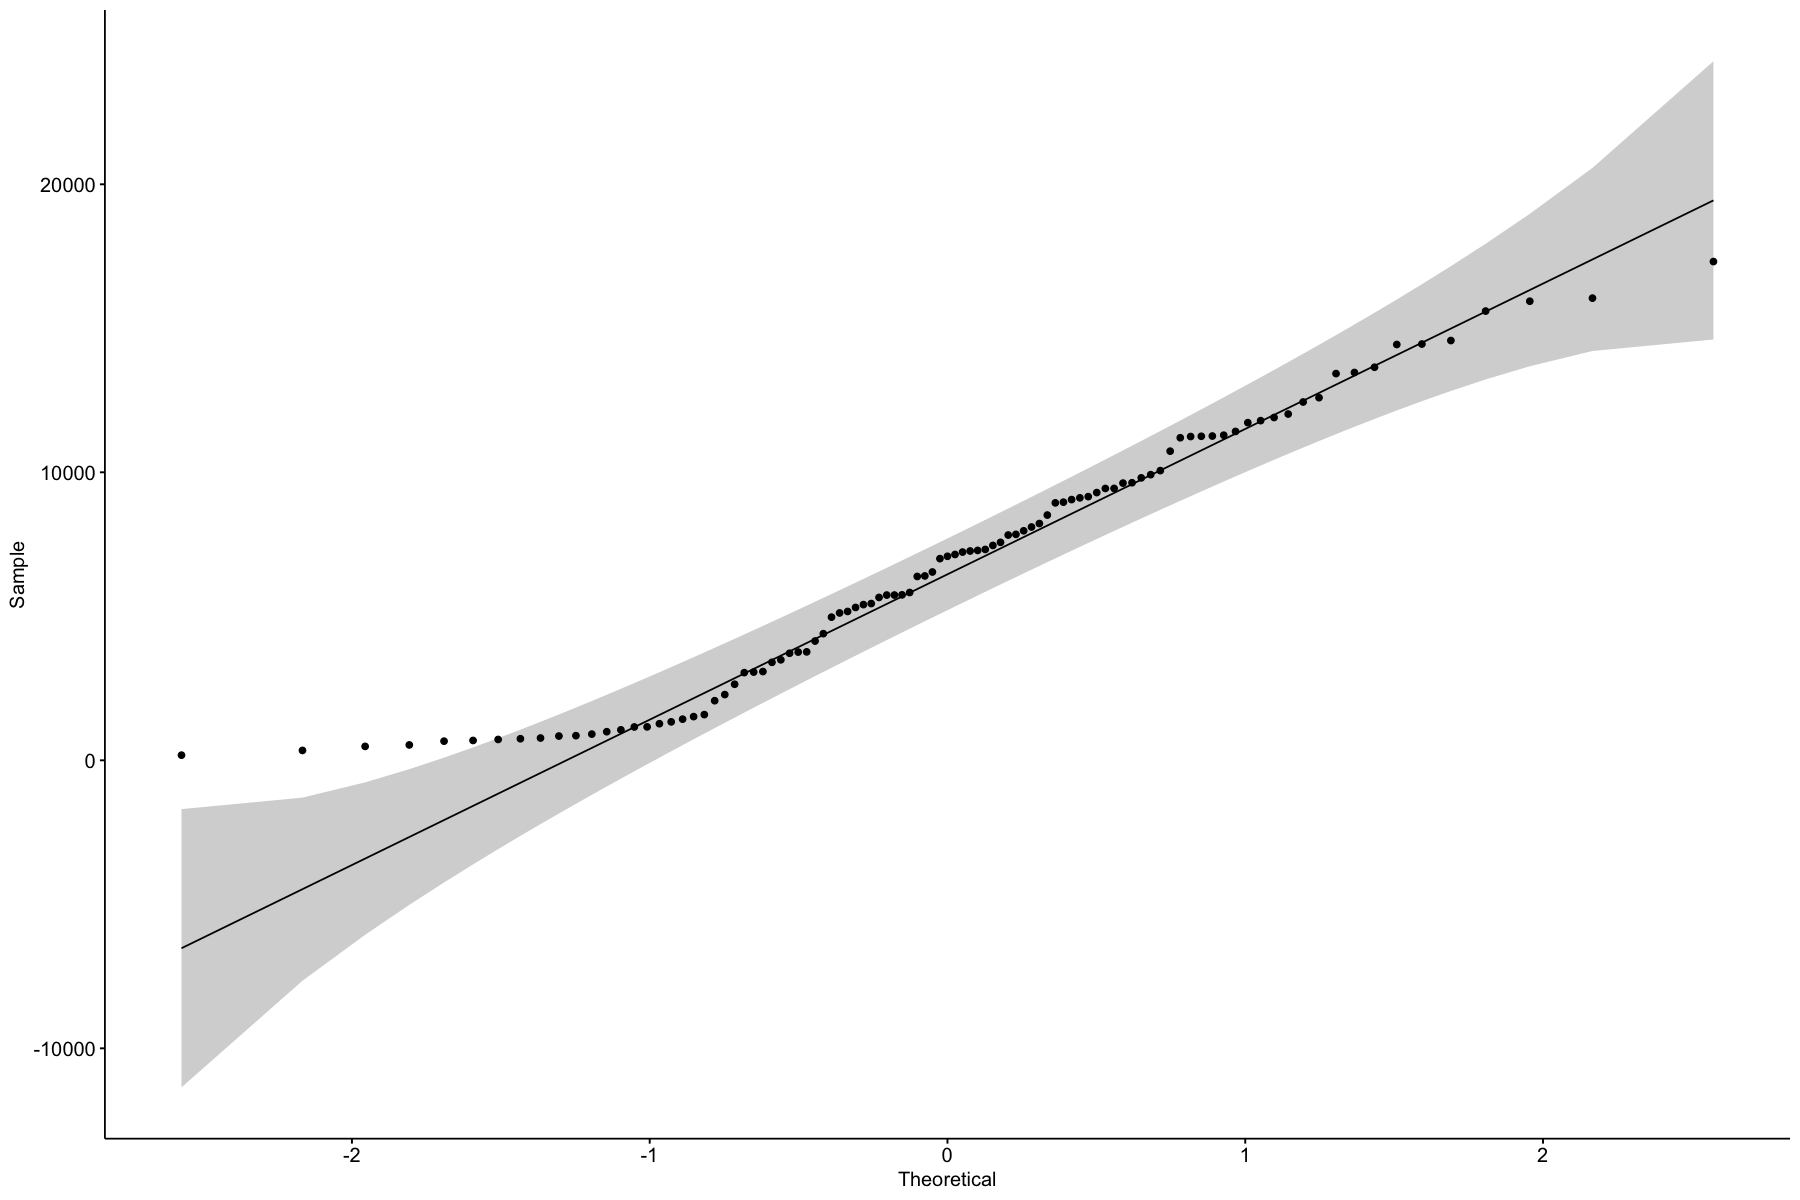

In [95]:
library("ggpubr")
#Test if data is normally distributed
set.seed(1234)
dplyr::sample_n(Ypet, 10)

#Plot data against a plot of normality to visualy inspect 
ggqqplot(Ypet$CorIntDen)
# Run the shapiro-wilks test to statsistically determine if the data is normal (H0 is that the data is normal, so P>0.05 is normal)
shapiro.test(Ypet$CorIntDen)

In [98]:
# Data is not normally distributed 
# data is not normally distributed. So we can't use s students T test. Need to use a non-parametric test:Kruskal-Wallis 

kruskal.test(CorIntDen ~ Genotype, data = Ypet)


	Kruskal-Wallis rank sum test

data:  CorIntDen by Genotype
Kruskal-Wallis chi-squared = 67.753, df = 3, p-value = 1.292e-14


In [99]:
#pvalue <0.05 therefore there are significant differences between groups. Run pairwise ocmparisons to find which are different. 

pairwise.wilcox.test(Ypet$CorIntDen, Ypet$Genotype,
                 p.adjust.method = "BH")

#  all WT vs mutant comparisons are sigD p<0.01


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  Ypet$CorIntDen and Ypet$Genotype 

      Double  E266K   R269Q  
E266K 0.99    -       -      
R269Q 5.0e-07 8.0e-06 -      
WT    4.4e-14 7.8e-12 2.4e-13

P value adjustment method: BH 

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
ERROR while rich displaying an object: Error in `palette()`:
! Insufficient values in manual scale. 4 needed but only 2 provided.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (i

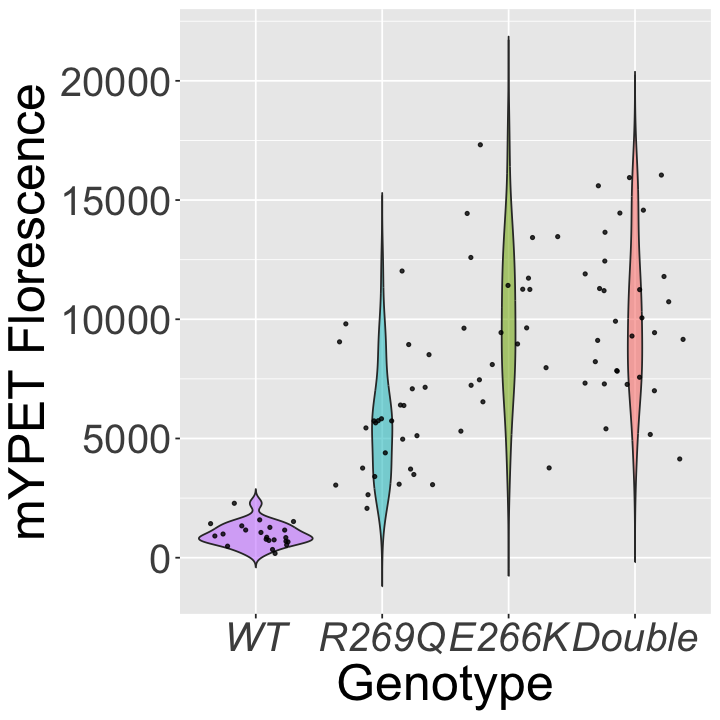

In [73]:
library(ggplot2)
library(tidyverse)
P<-Ypet %>%
  ggplot (aes(x=factor(Genotype, level=c('WT','R269Q','E266K', 'Double')), y=CorIntDen, fill=Genotype, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic","italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("mYPET Florescence")
P
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(Ypet) {
   m <- mean(Ypet)
   ymin <- m-sd(Ypet)
   ymax <- m+sd(Ypet)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

P + stat_summary(fun.data=data_summary)+scale_fill_manual(values=c("dodgerblue2","orange")) + theme_bw()


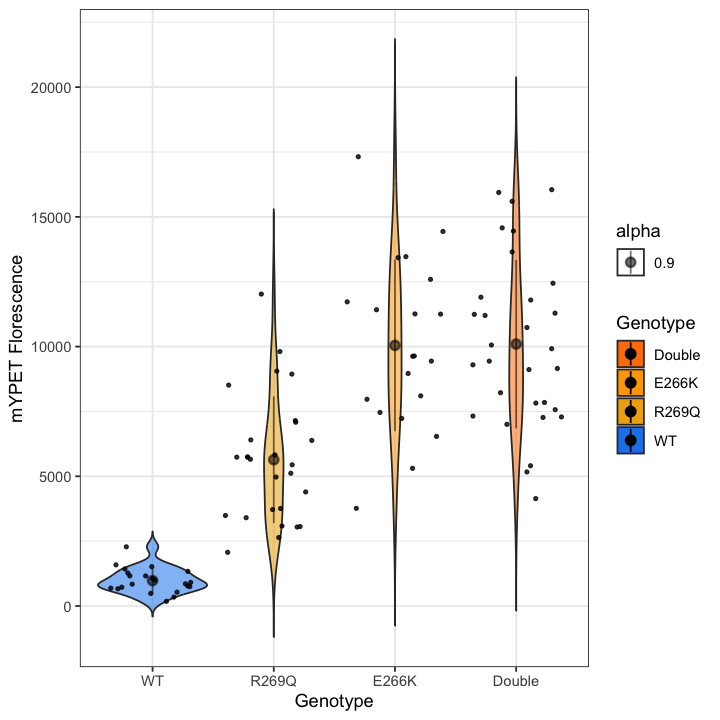

In [74]:
options(repr.plot.width=6, repr.plot.height=6)
P + stat_summary(fun.data=data_summary)+scale_fill_manual(values=c("dark orange1","orange","darkgoldenrod2", "dodgerblue2")) + theme_bw()

In [81]:
# Mike's data Botrezomib moss data
Bot <- read.table('/Users/aricha14/Documents/Research_Projects/TRF/Mike_data/BTZ.txt', sep='\t', header= TRUE)
head(Bot)

,Line,treatment,IntDen,Comb
,<chr>,<chr>,<dbl>,<chr>
1,ARFb1,DMSO,71.15326,b1_D
2,ARFb1,DMSO,38.25984,b1_D
3,ARFb1,DMSO,30.93325,b1_D
4,ARFb1,DMSO,18.32496,b1_D
5,ARFb1,DMSO,45.71637,b1_D
6,ARFb1,DMSO,37.15832,b1_D


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


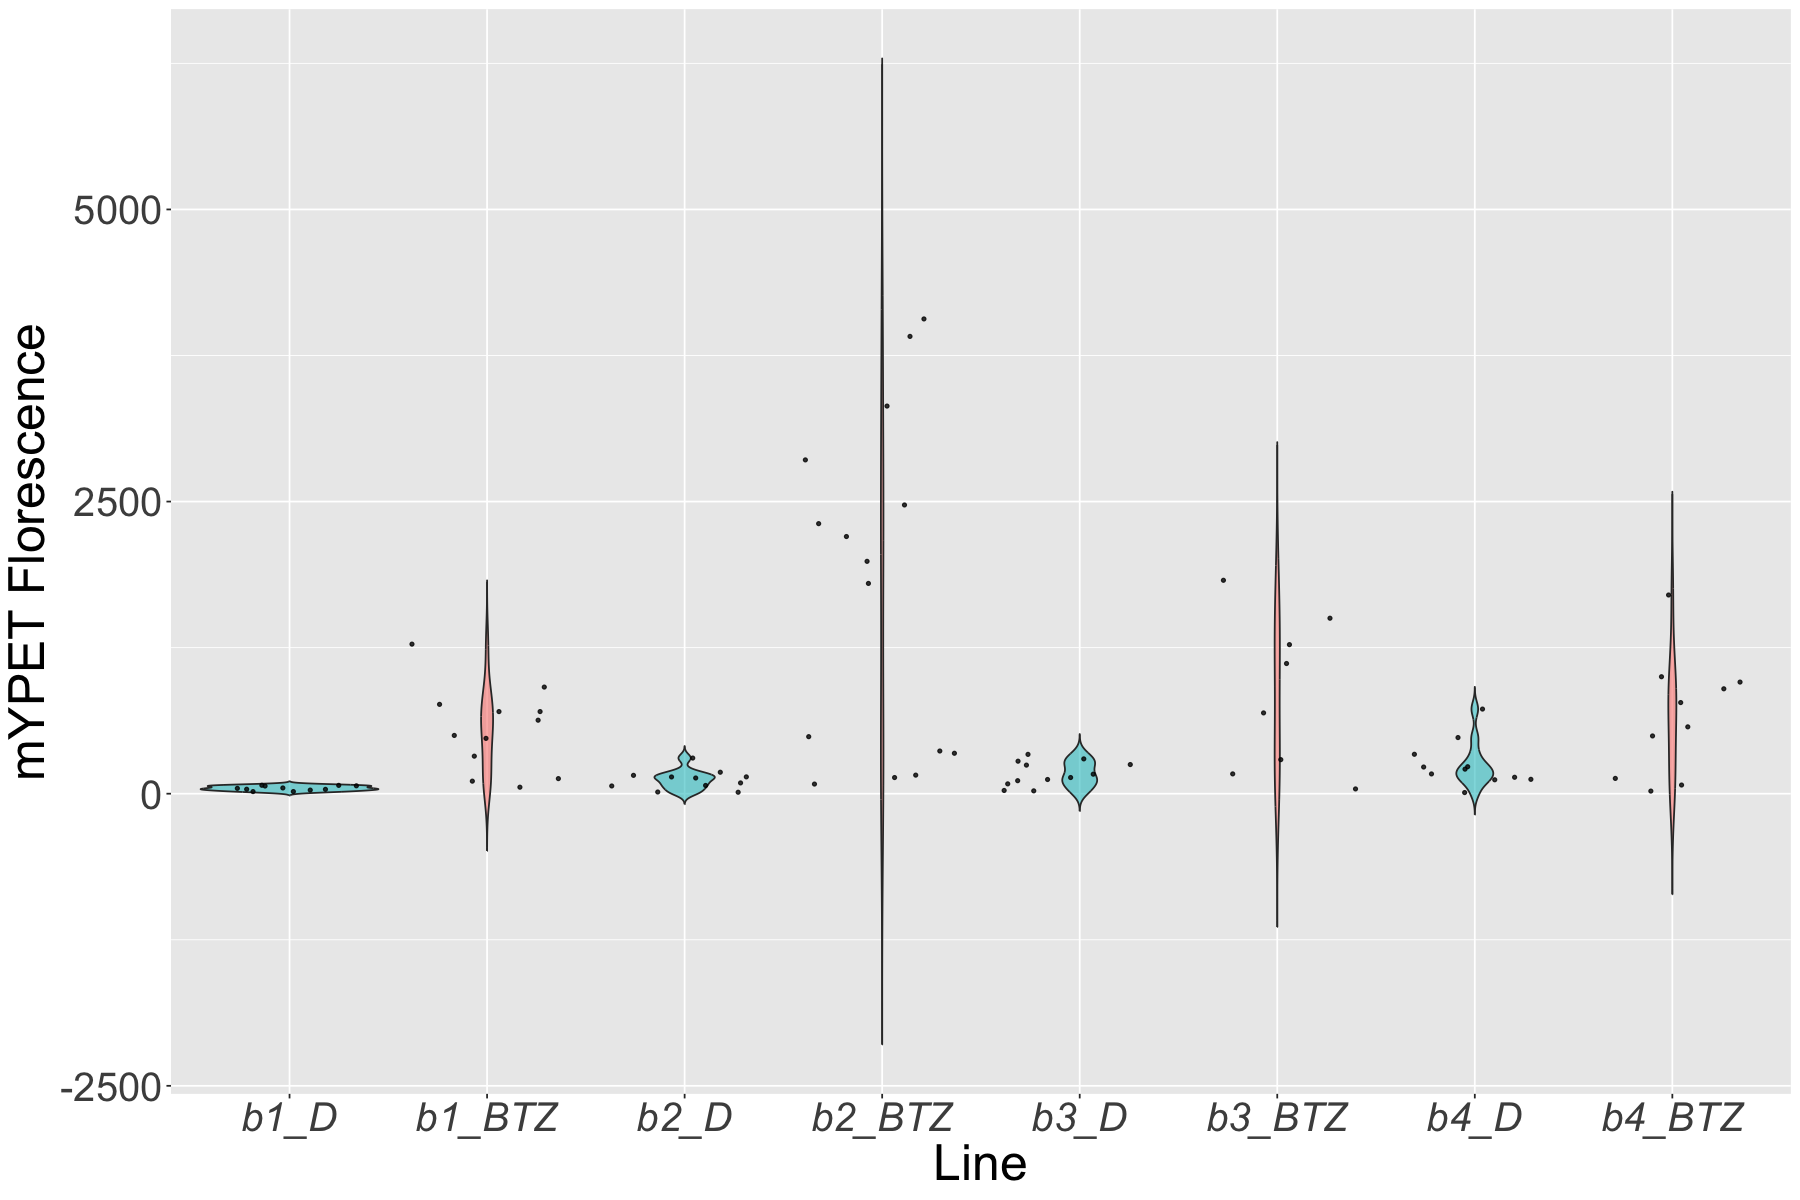

In [82]:
options(repr.plot.width=15, repr.plot.height=10)
P<-Bot %>%
  ggplot (aes(x=factor(Comb, level=c('b1_D','b1_BTZ','b2_D','b2_BTZ','b3_D','b3_BTZ', 'b4_D','b4_BTZ')), y=IntDen, fill=treatment, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic","italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Line")+
ylab("mYPET Florescence")
P
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(Bot) {
   m <- mean(Bot)
   ymin <- m-sd(Bot)
   ymax <- m+sd(Bot)
   return(c(y=m,ymin=ymin,ymax=ymax))
}


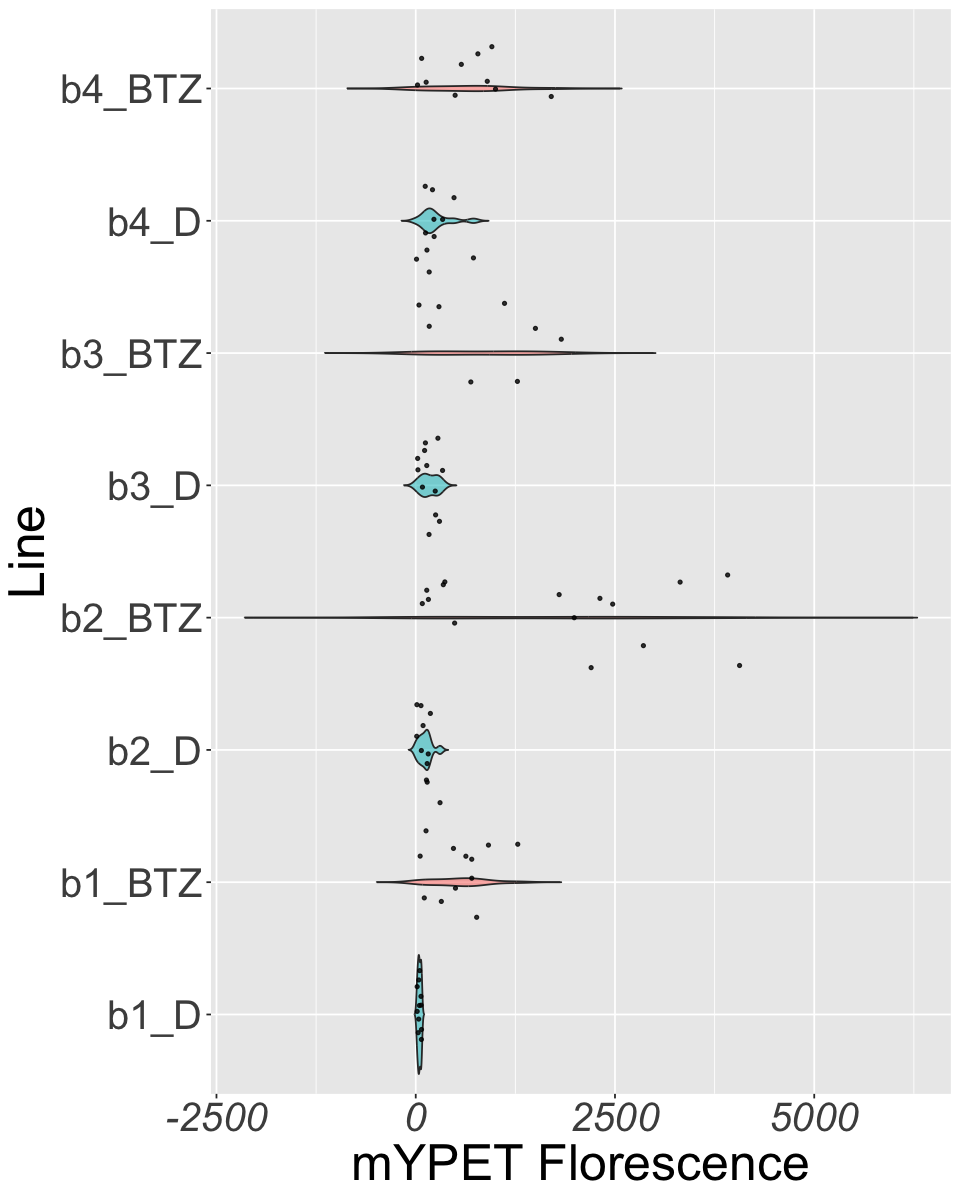

In [83]:
options(repr.plot.width=8, repr.plot.height=10)
P + coord_flip()

In [86]:
options(repr.plot.width=12, repr.plot.height=6)
# Function to produce summary statistics (mean and +/- sd)
Bot_data_summary <- function(Bot) {
   m <- mean(Bot)
   ymin <- m-sd(Bot)
   ymax <- m+sd(Bot)
   return(c(y=m,ymin=ymin,ymax=ymax))
}


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


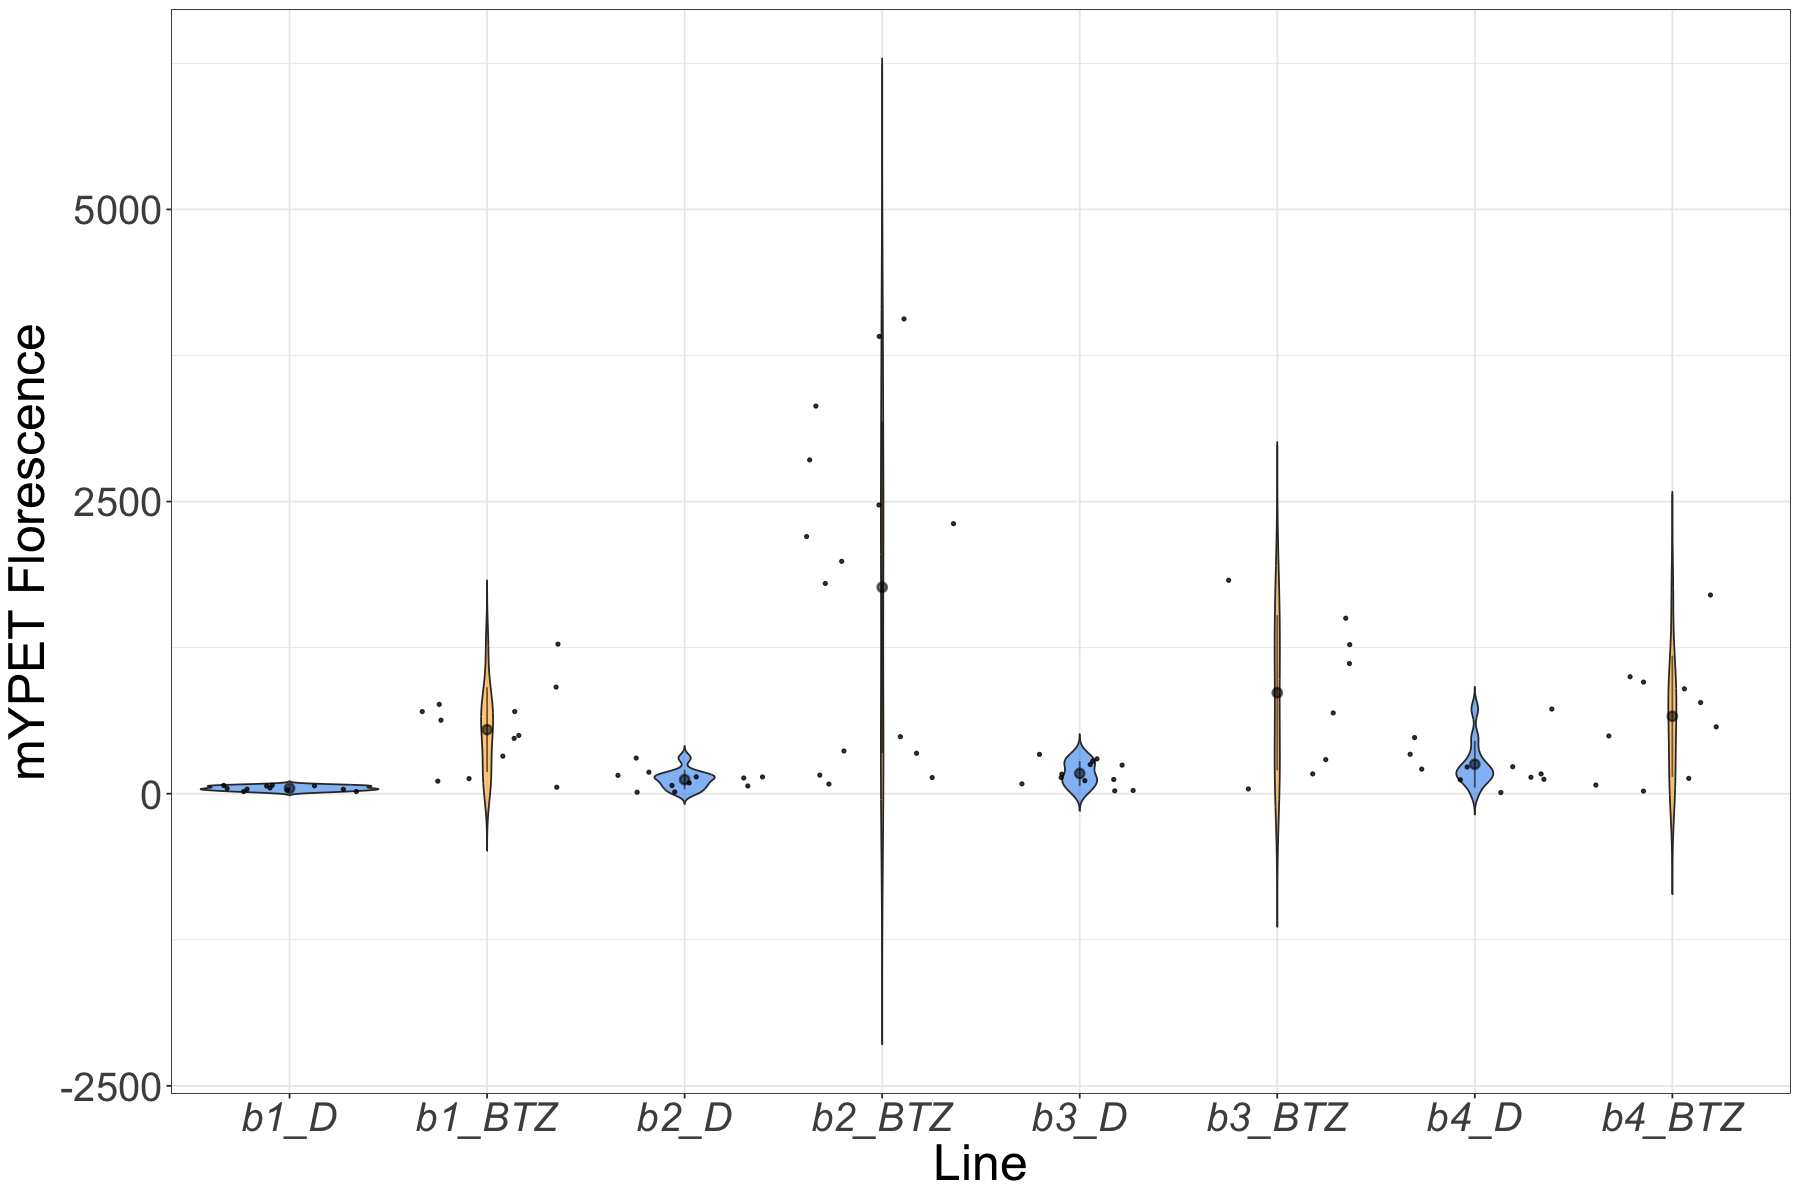

In [89]:
options(repr.plot.width=15, repr.plot.height=10)
P + stat_summary(fun.data=Bot_data_summary)+scale_fill_manual(values=c("orange","dodgerblue2")) + theme_bw() +
theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    )


Line,treatment,IntDen,Comb
<chr>,<chr>,<dbl>,<chr>
ARFb2,DMSO,157.02184,b2_D
ARFb4,DMSO,122.98171,b4_D
ARFb1,BTZ,702.77118,b1_BTZ
ARFb1,DMSO,49.16783,b1_D
ARFb1,DMSO,45.71637,b1_D
ARFb2,BTZ,4062.96065,b2_BTZ
ARFb1,BTZ,55.53976,b1_BTZ
ARFb1,DMSO,18.32496,b1_D
ARFb4,DMSO,228.18075,b4_D



	Shapiro-Wilk normality test

data:  Bot$IntDen
W = 0.67301, p-value = 7.437e-13


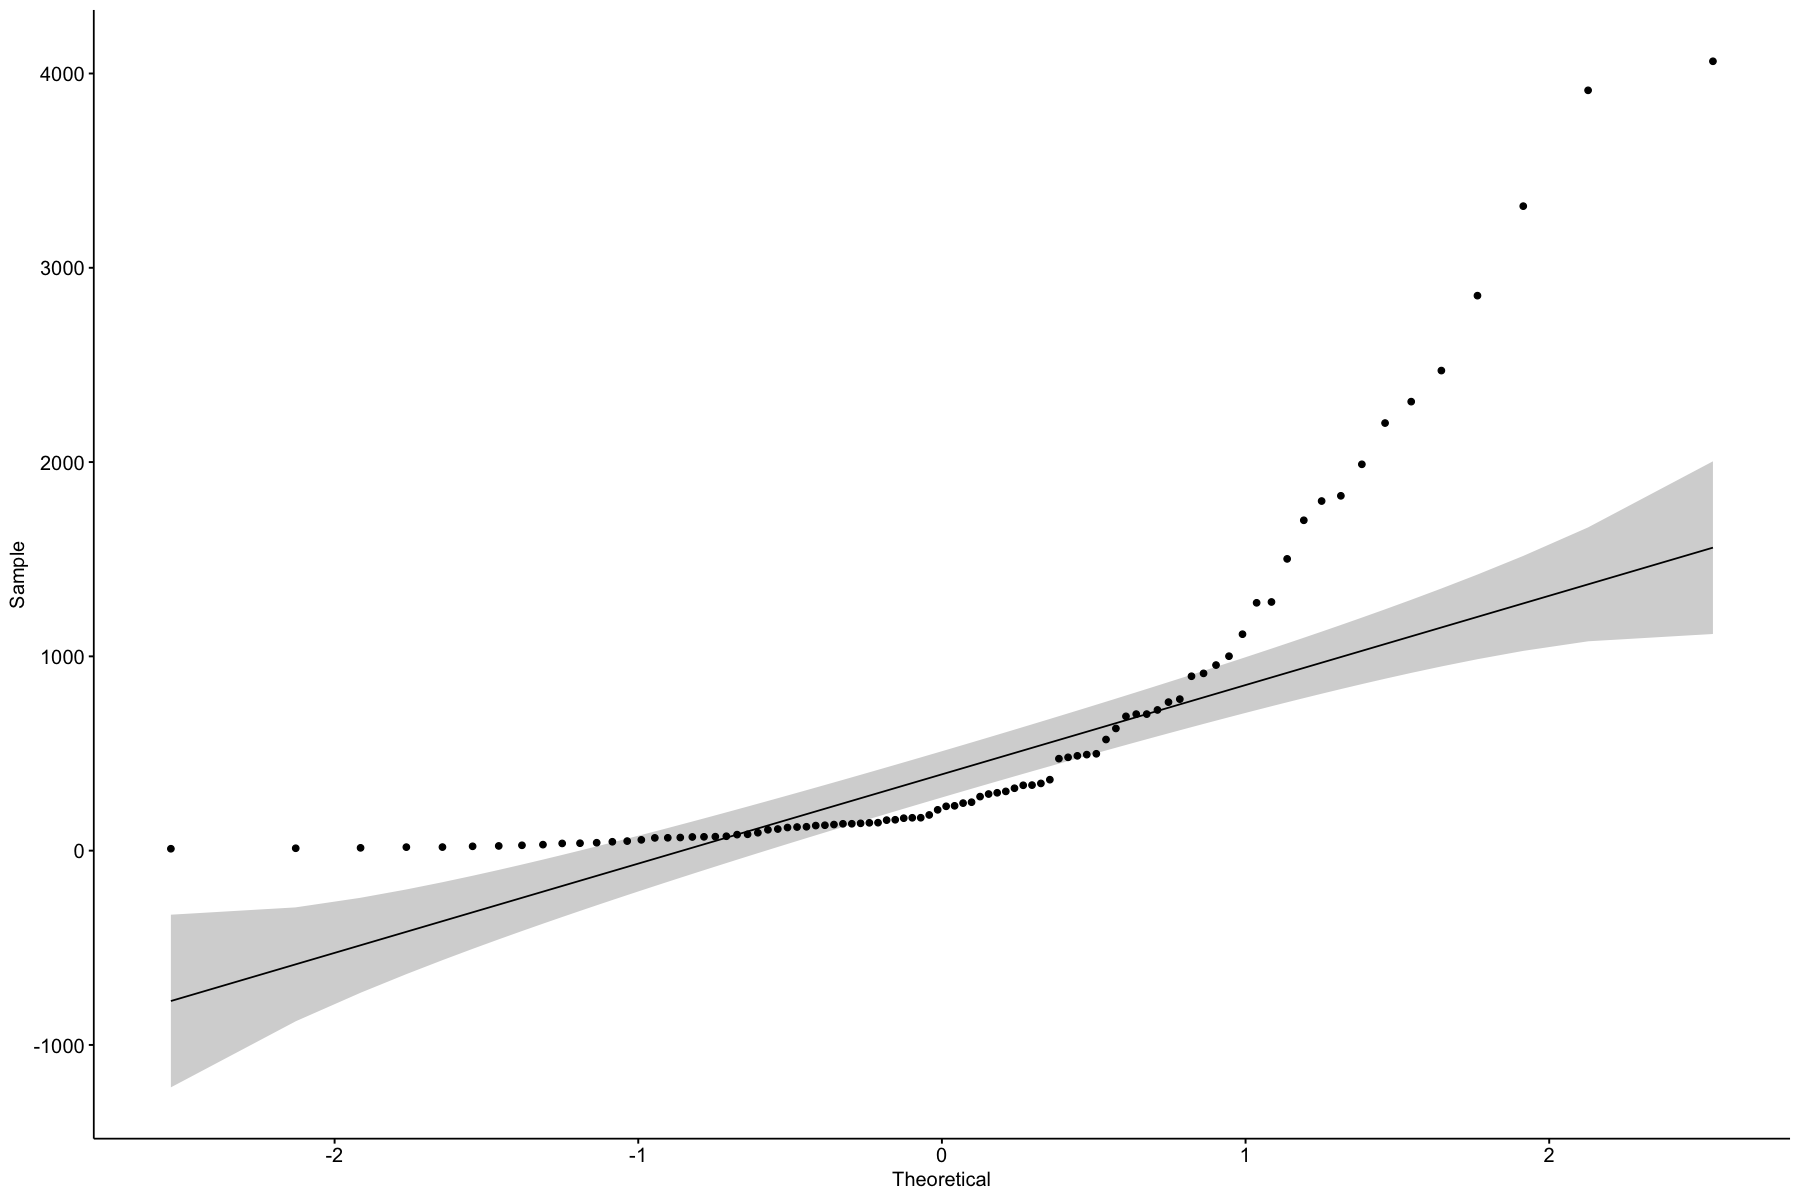

In [90]:
# Run statistical tests to see if sig differences in protein abundance
library("ggpubr")
#Test if data is normally distributed
set.seed(1234)
dplyr::sample_n(Bot, 10)

#Plot data against a plot of normality to visualy inspect 
ggqqplot(Bot$IntDen)
# Run the shapiro-wilks test to statsistically determine if the data is normal (H0 is that the data is normal, so P>0.05 is normal)
shapiro.test(Bot$IntDen)

In [91]:
#BTZ treatment data is not normally distributed. So we can't use s students T test. Need to use a non-parametric test:Kruskal-Wallis 

kruskal.test(IntDen ~ Comb, data = Bot)


	Kruskal-Wallis rank sum test

data:  IntDen by Comb
Kruskal-Wallis chi-squared = 43.089, df = 7, p-value = 3.206e-07


In [92]:
#pvalue <0.05 therfore there are signifcant differences between groups. Run pairwise ocmparisons to find which are different. 

pairwise.wilcox.test(Bot$IntDen, Bot$Comb,
                 p.adjust.method = "BH")

# Looks like ARFb1 D vs BTZ (p<0.01), ARFb2 D vs BTZ (p<0.01), ARFb3 D vs BTZ are all sigD p<0.05


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  Bot$IntDen and Bot$Comb 

       b1_BTZ  b1_D    b2_BTZ  b2_D    b3_BTZ  b3_D    b4_BTZ 
b1_D   0.00025 -       -       -       -       -       -      
b2_BTZ 0.10372 7.2e-06 -       -       -       -       -      
b2_D   0.01397 0.05239 0.00121 -       -       -       -      
b3_BTZ 0.47678 0.00318 0.18173 0.01731 -       -       -      
b3_D   0.01935 0.00765 0.00280 0.33547 0.03416 -       -      
b4_BTZ 0.58241 0.00280 0.10727 0.03933 0.47678 0.07450 -      
b4_D   0.10727 0.00280 0.01505 0.10727 0.08337 0.47678 0.10757

P value adjustment method: BH 

In [60]:
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(Ypet) {
   m <- mean(Ypet)
   ymin <- m-sd(Ypet)
   ymax <- m+sd(Ypet)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

P +scale_fill_manual(values=c("orange","dodgerblue2")) + theme_bw()


function(Bot) {
   m <- mean(Bot)
   ymin <- m-sd(Bot)
   ymax <- m+sd(Bot)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

In [15]:
Mo17<-read.table('/Users/aricha14/Documents/TRF/Amber_Mo17_data.txt', header=TRUE, sep='\t')
head(Mo17)
dim(Mo17)

,family,plant_number,BX,phenotype,leaf_number,height..cm.
,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,2317,1,Mo17,Trf/+,19,132
2,2317,3,Mo17,Trf/+,17,200
3,2317,4,Mo17,Trf/+,20,219
4,2317,7,Mo17,Trf/+,19,214
5,2317,8,Mo17,Trf/+,18,217
6,2317,9,Mo17,Trf/+,19,226


[1] 31  6

In [6]:
W22<-read.table('/Users/aricha14/Documents/TRF/Trf_W22_leaf_number.txt', header=TRUE, sep='\t')
head(W22)
dim(W22)


,Info,family,plant_number,phenotype,genotype,leaf_number,node_number,BX
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
1,Trf_W22,2318,1,N,+/+,13,13,W22
2,Trf_W22,2318,2,mut,Trf/+,23,na,W22
3,Trf_W22,2318,3,mut,Trf/+,25,18,W22
4,Trf_W22,2318,4,mut,Trf/Trf,33,20,W22
5,Trf_W22,2318,5,mut,Trf/Trf,48,21,W22
6,Trf_W22,2318,6,mut,Trf/+,57,18,W22


[1] 27  8

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


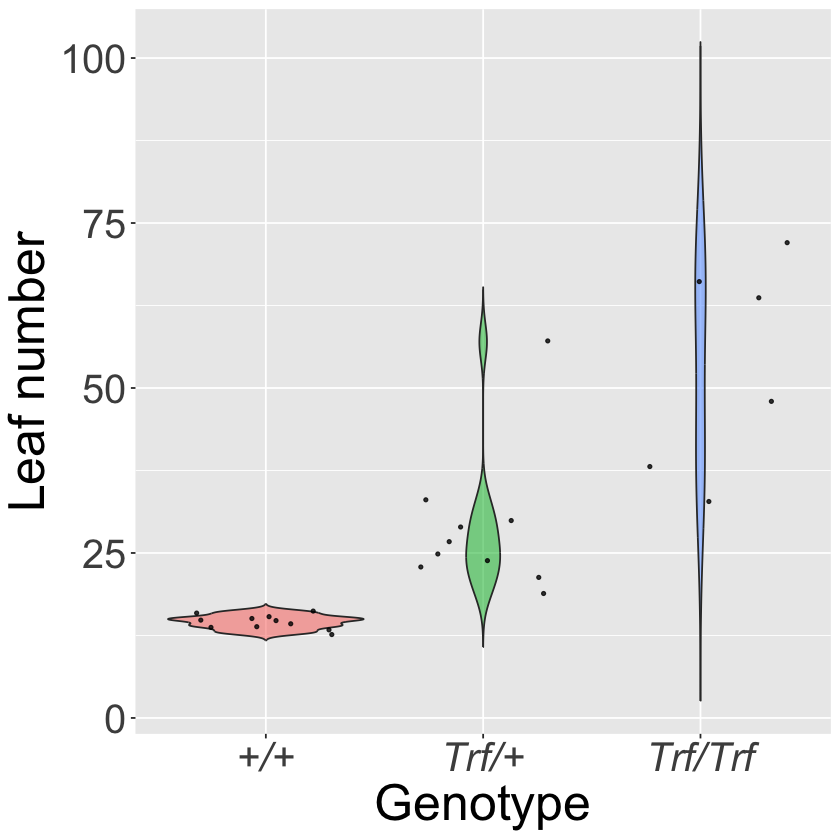

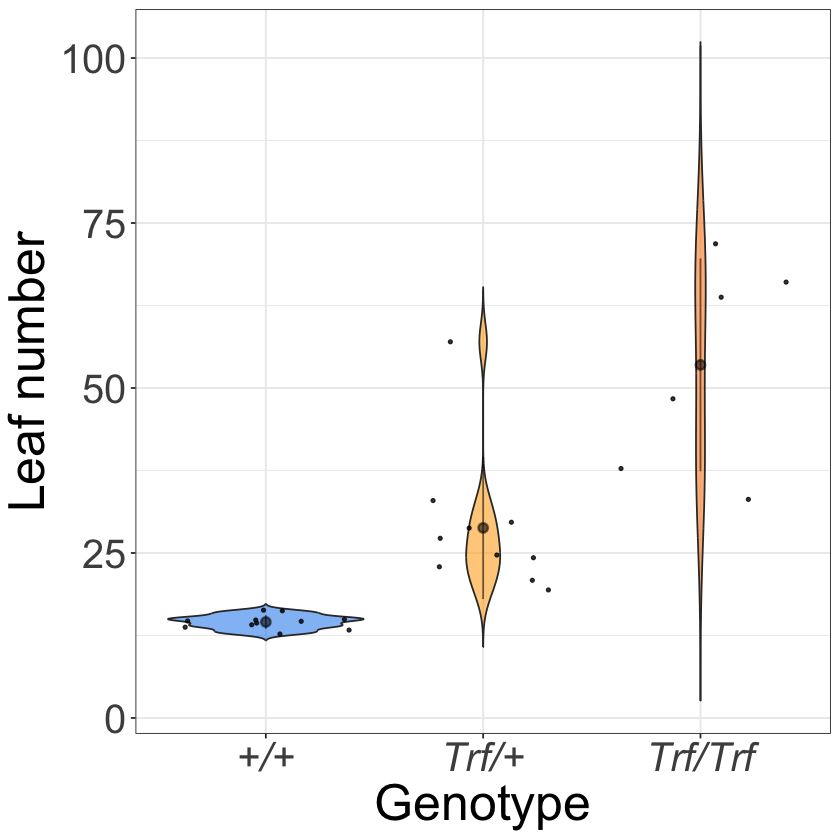

In [14]:
library(ggplot2)
library(tidyverse)
P<-W22 %>%
  ggplot (aes(x=factor(genotype, level=c('+/+','Trf/+','Trf/Trf')), y=leaf_number, fill=genotype, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Leaf number")
P
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(W22) {
   m <- mean(W22)
   ymin <- m-sd(W22)
   ymax <- m+sd(W22)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

P + stat_summary(fun.data=data_summary)+scale_fill_manual(values=c("dodgerblue2","orange", "dark orange1")) + theme_bw() +
theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    )


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


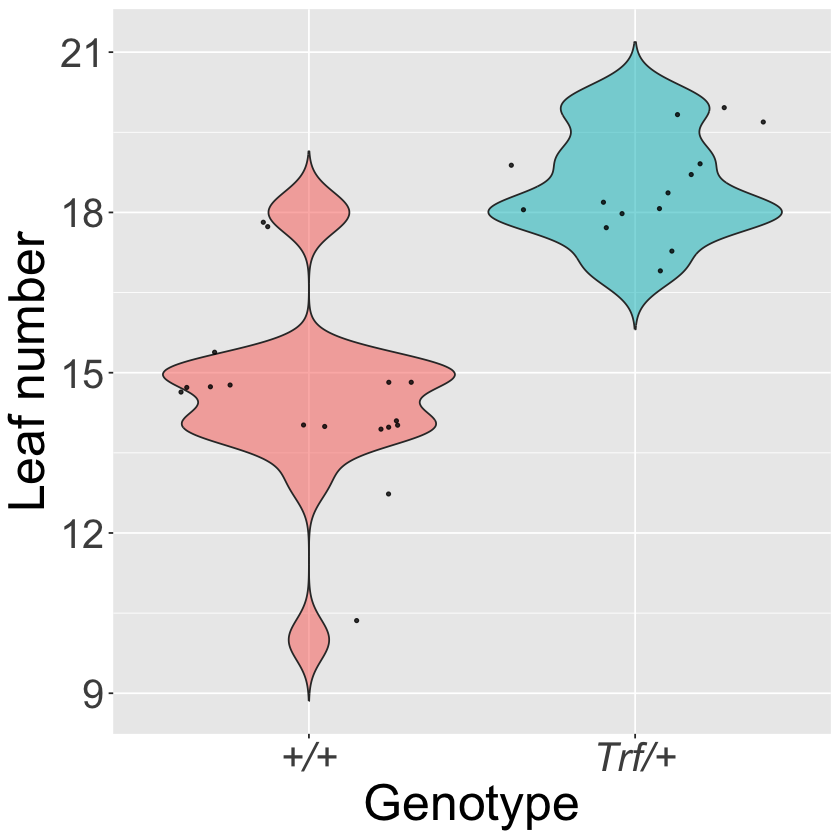

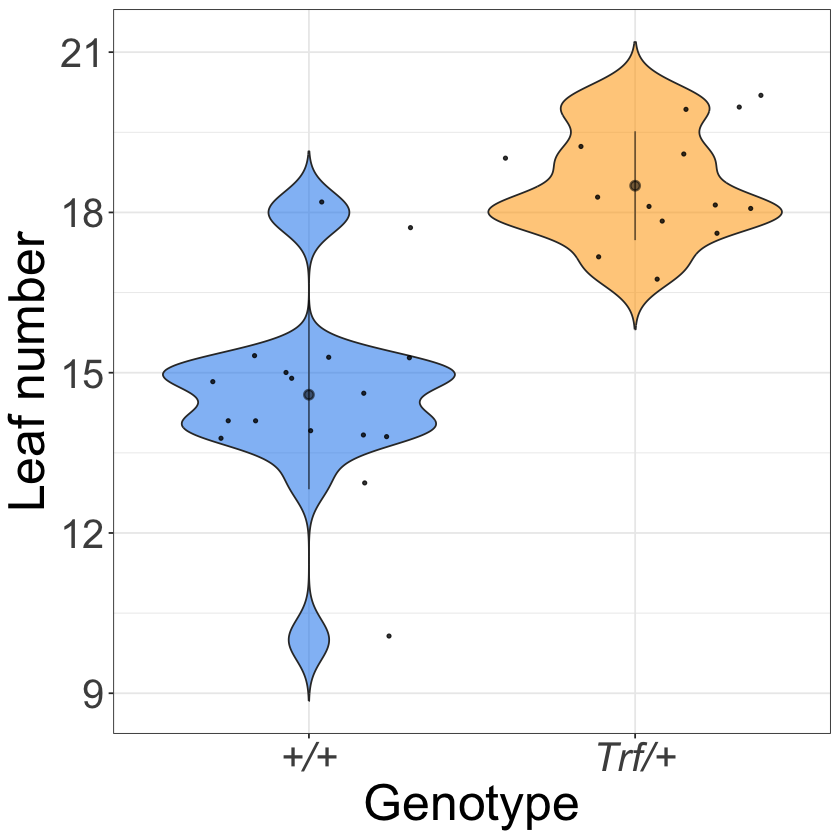

In [17]:
P2<-Mo17 %>%
  ggplot (aes(x=factor(phenotype, level=c('+/+','Trf/+')), y=leaf_number, fill=phenotype, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Leaf number")
P2
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(W22) {
   m <- mean(W22)
   ymin <- m-sd(W22)
   ymax <- m+sd(W22)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

P2 + stat_summary(fun.data=data_summary)+scale_fill_manual(values=c("dodgerblue2","orange")) + theme_bw() +
theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    )

In [57]:
T<-read.table('/Users/aricha14/Documents/TRF/Trf_leaf_number.txt', header=TRUE, sep='\t')
head(T)
dim(T)

,family,plant_number,BX,phenotype,leaf_number,Geno,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2317,1,Mo17,Trf/+,19,Mo17_Trf/+,NA,NA,NA,NA,NA,NA,NA,NA
2,2317,3,Mo17,Trf/+,17,Mo17_Trf/+,NA,NA,NA,NA,NA,NA,NA,NA
3,2317,4,Mo17,Trf/+,20,Mo17_Trf/+,NA,NA,NA,NA,NA,NA,NA,NA
4,2317,7,Mo17,Trf/+,19,Mo17_Trf/+,NA,NA,NA,NA,NA,NA,NA,NA
5,2317,8,Mo17,Trf/+,18,Mo17_Trf/+,NA,NA,NA,NA,NA,NA,NA,NA
6,2317,9,Mo17,Trf/+,19,Mo17_Trf/+,NA,NA,NA,NA,NA,NA,NA,NA


[1] 58 14

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


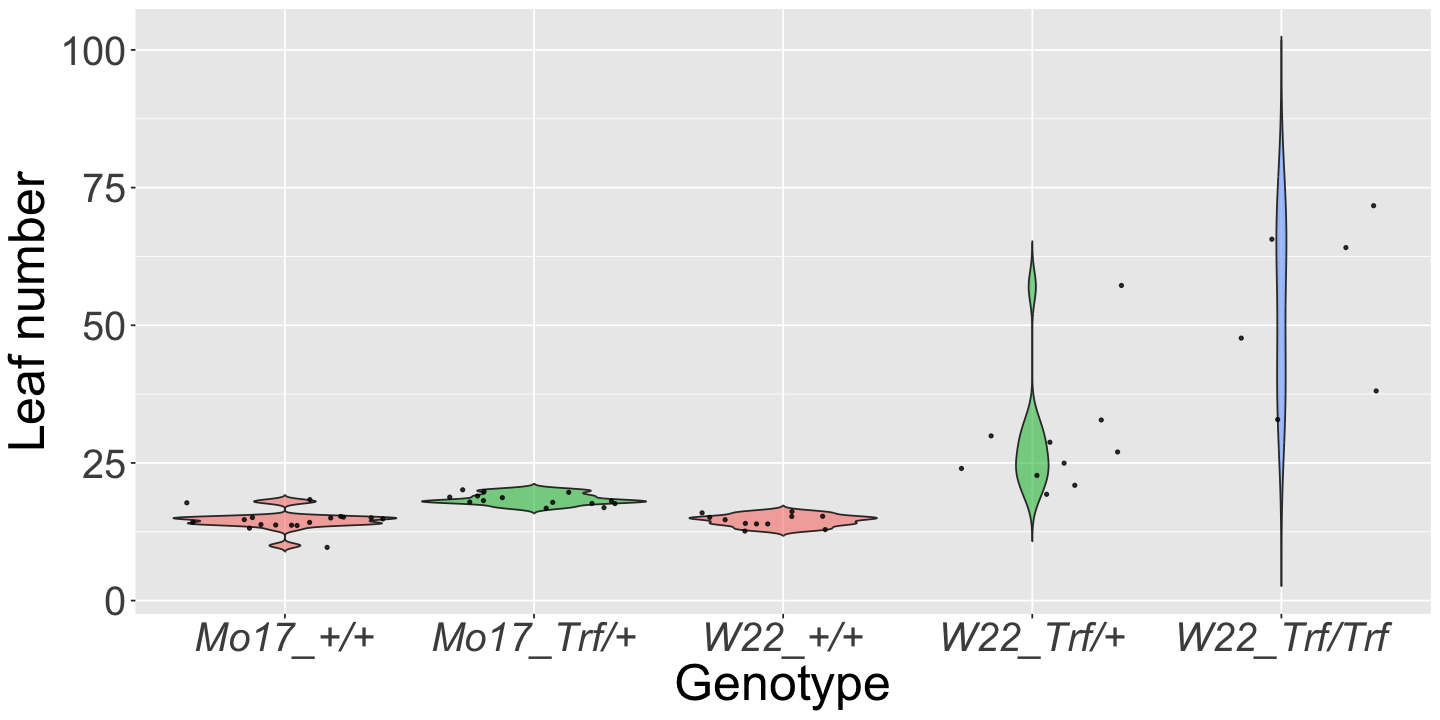

In [61]:
P3<-T %>%
  ggplot (aes((group = BX), x=factor(Geno, level=c('Mo17_+/+','Mo17_Trf/+','W22_+/+','W22_Trf/+','W22_Trf/Trf')), y=leaf_number, fill=phenotype, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Leaf number")
P3
# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(T) {
   m <- mean(T)
   ymin <- m-sd(T)
   ymax <- m+sd(T)
   return(c(y=m,ymin=ymin,ymax=ymax))
}



Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Computation failed in `stat_summary()`
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


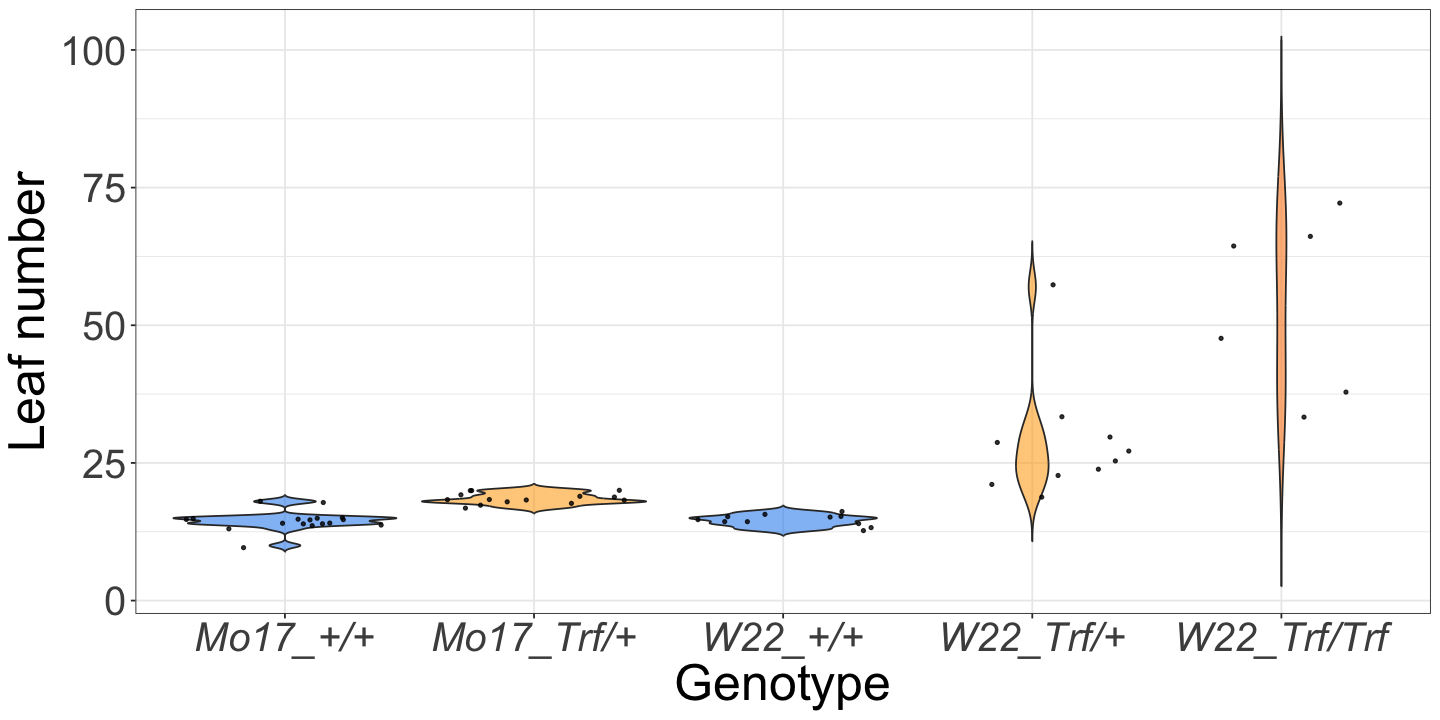

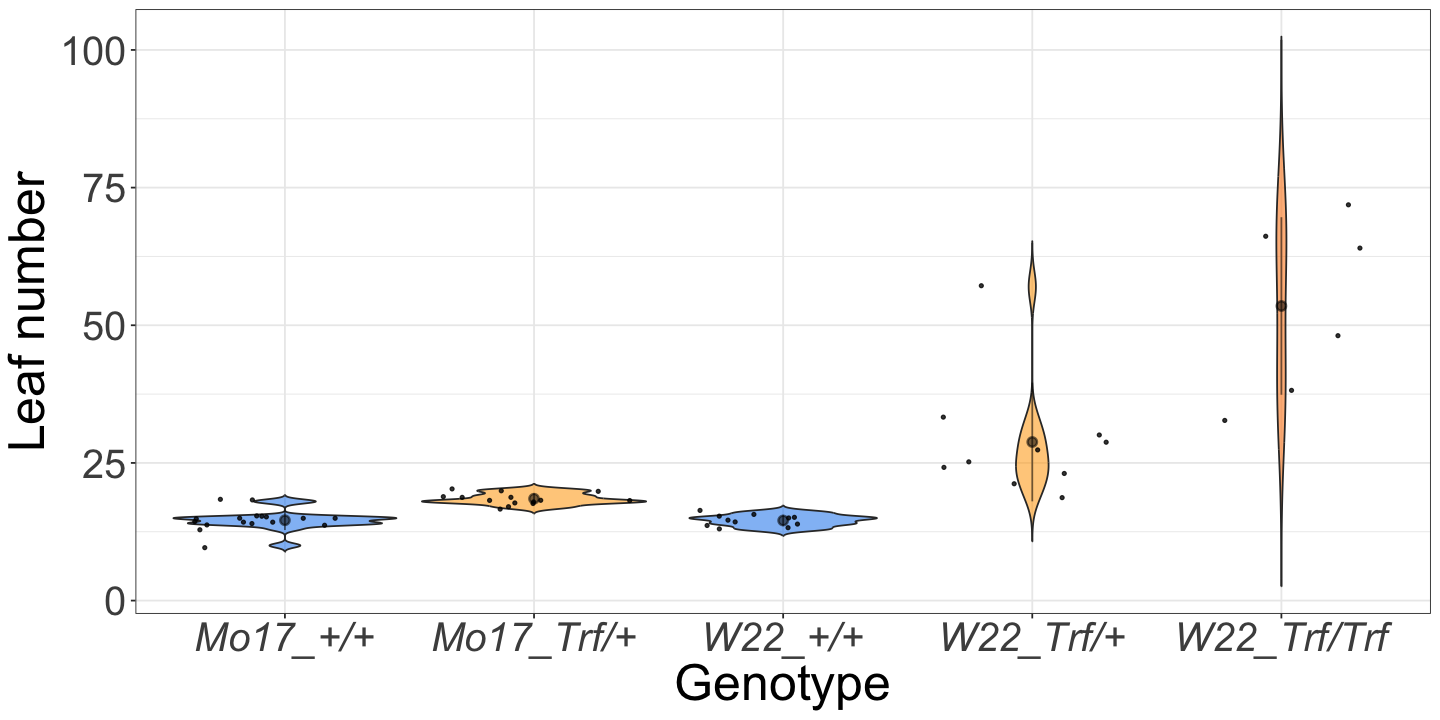

In [68]:
options(repr.plot.width=12, repr.plot.height=6)
P3 + stat_summary(fun.data = "mean_sdl", geom = "crossbar", width = 0.5, colour = "black") + scale_fill_manual(values=c("dodgerblue2","orange","darkorange1")) + theme_bw() +
theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    )

P3 + stat_summary(fun.data=data_summary)+scale_fill_manual(values=c("dodgerblue2","orange","darkorange1")) + theme_bw() +
theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    )


Warning message:
“Computation failed in `stat_summary()`
Caused by error in `fun.data()`:
! The package "Hmisc" is required.”


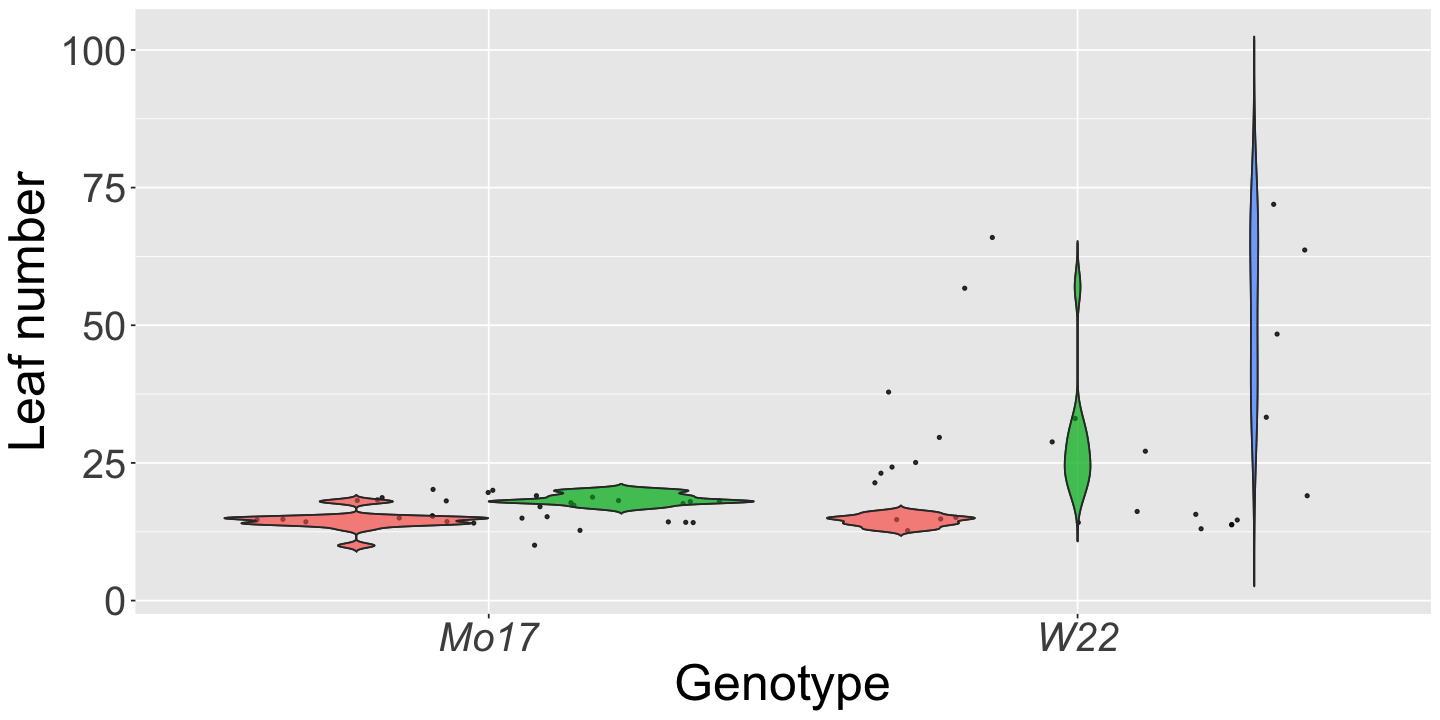

In [56]:
options(repr.plot.width=12, repr.plot.height=6)
P3 + geom_violin(trim = FALSE) + 
  stat_summary(
    fun.data = "mean_sdl",  fun.args = list(mult = 1), 
    geom = "crossbar", color = "black"
    )

,family,plant_number,BX,phenotype,leaf_number,height..cm.
,<int>,<int>,<chr>,<chr>,<int>,<int>
1,2317,1,Mo17,Trf/+,19,132
2,2317,3,Mo17,Trf/+,17,200
3,2317,4,Mo17,Trf/+,20,219
4,2317,7,Mo17,Trf/+,19,214
5,2317,8,Mo17,Trf/+,18,217
6,2317,9,Mo17,Trf/+,19,226


[1] 22  6

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message in stat_summary(fun = "mean", geom = "point", width = 0.5, colour = "black", :
“Ignoring unknown parameters: `width`”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


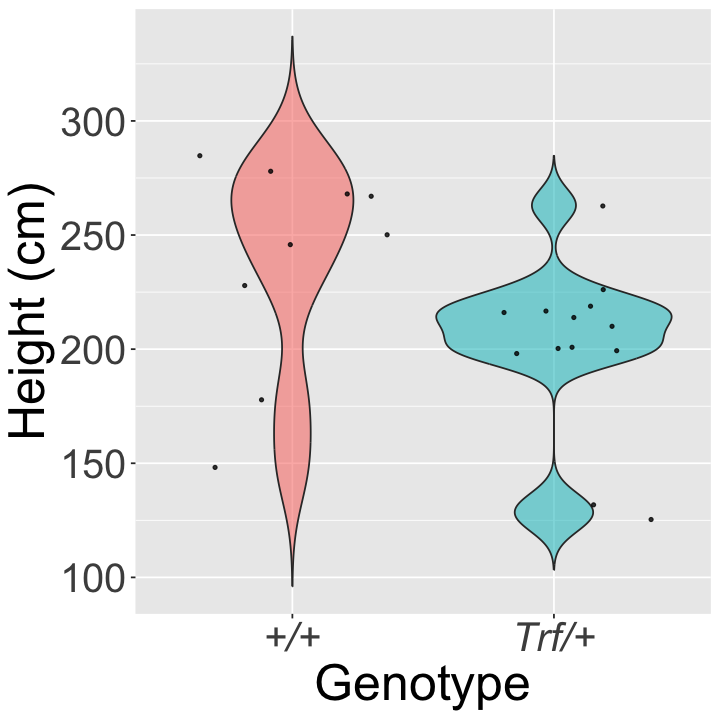

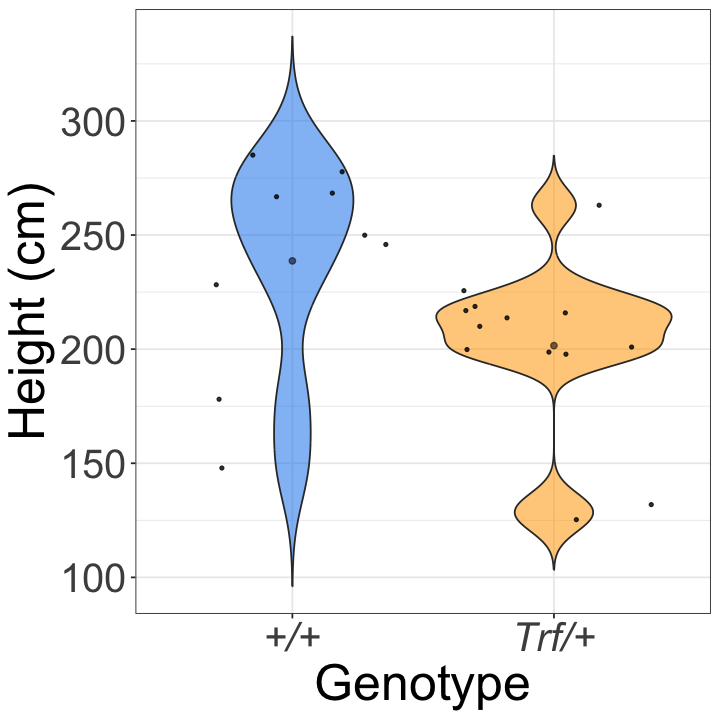

In [49]:
H<-read.table('/Users/aricha14/Documents/Research_Projects/TRF/Mo17_height.txt', header=TRUE, sep='\t')
head(H)
dim(H)

options(repr.plot.width=6, repr.plot.height=6)
P4<-H %>%
  ggplot (aes(x=factor(phenotype, level=c('+/+','Trf/+')), y=height..cm., fill=phenotype, alpha = 0.9)) +
    geom_violin(trim=FALSE) +
    geom_jitter(color="black", size=0.8, alpha=0.8) +
    theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    ) +
    xlab("Genotype")+
ylab("Height (cm)")
P4


P4 + stat_summary(fun = "mean", geom = "point", width = 0.5, colour = "black",position = position_dodge(0.9)) + scale_fill_manual(values=c("dodgerblue2","orange")) + theme_bw() +
theme(
      legend.position="none",
        text = element_text(size = 30),
        axis.text.x=element_text(face=c("italic","italic")),
      plot.title = element_text(size=11)
    )


In [126]:
T %>% group_by(Geno)%>% summarise_at(vars(leaf_number), list(name=mean))

Geno,name
<chr>,<dbl>
Mo17_+/+,14.58824
Mo17_Trf/+,18.50000
W22_+/+,14.54545
W22_Trf/+,28.80000
W22_Trf/Trf,53.50000


In [50]:
# Plotting leaf initiation data 
BA<-read.table('/Users/aricha14/Documents/TRF/Leaf_initiation_data_BXaverages_Amber.txt', header=TRUE, sep='\t')
head(BA)
dim(BA)

,BX,Geno,Date,Mean,SD,Upper,Lower,n
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,W22,het,5,5.25,0.5000000,6.000000,4.500000,4
2,W22,het,6,6.90,0.7378648,8.006797,5.793203,10
3,W22,het,7,8.80,1.5491933,11.123790,6.476210,10
4,W22,het,8,11.00,1.4142136,13.121320,8.878680,10
5,W22,het,9,14.70,4.1646662,20.946999,8.453001,10
6,W22,het,10,24.40,6.2751715,33.812757,14.987243,10


[1] 32  8